<font size=20>
Import Packages


In [1]:
import math
import geopandas as gpd
import matplotlib.pyplot as plt  
import matplotlib.animation 
import numpy as np
import requests 
import os
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from itertools import chain
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import TwoSlopeNorm
import statistics


<font size=20>
Insert filter here


In [2]:
assignee = "shell oil company"

<font size=20>Check if filter works

In [3]:

#read files inside folder for translational data


from typing import List
import pathlib
wd = os.getcwd()
wd = wd+"/Prepared_Data"
def find_excel_files_in(directory:pathlib.Path) -> List[pathlib.Path]:
    
    files:List[pathlib.Path] = list()
    for filepath in directory.rglob('*.csv'):
        if filepath.is_file():
            files.append(filepath)

    return files

# List of your directories
directories:List[str] = [format(wd)]

found_files:List[pathlib.Path] = list()

for directory in directories:
    directory:pathlib.Path = pathlib.Path(directory)
    found_files.extend(find_excel_files_in(directory))

#read excel files
for files in found_files:
    data = pd.read_csv(files)
#filter for assignee/applicants
#Prepare a compare column for assignee filter
assignee2 = assignee.lower()
assignee2 = assignee2.replace(" ","")
data["compare"] = data["optimized_assignee"]
data["compare"] =data["compare"].str.lower()
data["compare"] =data["compare"].str.replace(" ","")
#converting inpadoc_family_members back to list
data["inpadoc_family_members"] = data["inpadoc_family_members"].str.replace("'","")
data["inpadoc_family_members"] = data["inpadoc_family_members"].str.replace("[","")
data["inpadoc_family_members"] = data["inpadoc_family_members"].str.replace("]","")
data["inpadoc_family_members"] = data["inpadoc_family_members"].str.replace(" ","")
data["inpadoc_family_members"] = data["inpadoc_family_members"].fillna("")
data["inpadoc_family_members"] = data.apply(lambda x: x["inpadoc_family_members"] 
                                                        if len(x["inpadoc_family_members"]) > 4 
                                                        else "",axis=1 )
#check if publication number has been added to inpadoc_family_members and if not add it
data["inpadoc_family_members"] = data.apply(lambda x: str(x["publication_number"])+ " | " +str(x["inpadoc_family_members"]) 
                                            if str(x["publication_number"]) not in str(x["inpadoc_family_members"]) else str(x["inpadoc_family_members"])
                                            ,axis = 1)

#prepare inpadoc_family_members_column
data["inpadoc_family_members"] = data.apply(lambda x: str(x["inpadoc_family_members"]).split(","),axis = 1)
#apply filter
data = data[data["compare"]==assignee2]
data.drop("compare",axis = 1,inplace = True)


C:\Users\aedem\AppData\Local\Temp\ipykernel_17372\4019599462.py:45: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["inpadoc_family_members"] = data["inpadoc_family_members"].str.replace("[","")
C:\Users\aedem\AppData\Local\Temp\ipykernel_17372\4019599462.py:46: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["inpadoc_family_members"] = data["inpadoc_family_members"].str.replace("]","")


In [4]:

if len(data) == 0:
    print("WARNING: no data available using this filter")
    print("number of patents in the dataframe: "+str(len(data)))
else:
    print("filter application works")
    print("number of patents in the dataframe: "+str(len(data)))

filter application works
number of patents in the dataframe: 20


<font size=20>read files inside folder for translational data

In [5]:

#read files inside folder for translation data


from typing import List
import pathlib
wd = os.getcwd()
wd = wd+"/Prepared_Data"
def find_excel_files_in(directory:pathlib.Path) -> List[pathlib.Path]:
    
    files:List[pathlib.Path] = list()
    for filepath in directory.rglob('*.csv'):
        if filepath.is_file():
            files.append(filepath)

    return files

# List of your directories
directories:List[str] = [format(wd)]

found_files:List[pathlib.Path] = list()

for directory in directories:
    directory:pathlib.Path = pathlib.Path(directory)
    found_files.extend(find_excel_files_in(directory))


for files in found_files:
    data = pd.read_csv(files)

#filter for assignee/applicants
#Prepare a compare column for assignee filter
assignee2 = assignee.lower()
assignee2 = assignee2.replace(" ","")
data["compare"] = data["optimized_assignee"]
data["compare"] =data["compare"].str.lower()
data["compare"] =data["compare"].str.replace(" ","")
#converting inpadoc_family_members back to list
data["inpadoc_family_members"] = data["inpadoc_family_members"].str.replace("'","")
data["inpadoc_family_members"] = data["inpadoc_family_members"].str.replace("[","")
data["inpadoc_family_members"] = data["inpadoc_family_members"].str.replace("]","")
data["inpadoc_family_members"] = data["inpadoc_family_members"].str.replace(" ","")
data["inpadoc_family_members"] = data["inpadoc_family_members"].fillna("")
data["inpadoc_family_members"] = data.apply(lambda x: x["inpadoc_family_members"] 
                                                        if len(x["inpadoc_family_members"]) > 4 
                                                        else "",axis=1 )
#check if publication number has been added to inpadoc_family_members and if not add it
data["inpadoc_family_members"] = data.apply(lambda x: str(x["publication_number"])+ " | " +str(x["inpadoc_family_members"]) 
                                            if str(x["publication_number"]) not in str(x["inpadoc_family_members"]) else str(x["inpadoc_family_members"])
                                            ,axis = 1)

#prepare inpadoc_family_members_column
data["inpadoc_family_members"] = data.apply(lambda x: str(x["inpadoc_family_members"]).split(","),axis = 1)

#apply filter
data = data[data["compare"]==assignee2]
data.drop("compare",axis = 1,inplace = True)

#creation of comparable dataframe
data_compare = data


#creation of df containg every family member as entry even tho some data might not exists 
publication_number = []
inpadoc_family = []
listdata = list(data.inpadoc_family_members)
for i in range(len(listdata)):
    for k in range(len(listdata[i])):
        #print(str(i)+"   "+str(k)+"list:"+listdata[i][k])
        publication_number.append(listdata[i][k])
        inpadoc_family.append(listdata[i])
d = {'publication_number': publication_number,
    'inpadoc_family_members': inpadoc_family}
data_family = pd.DataFrame(data=d)
#make column inpadoc_family_members mergable
data["inpadoc_family_members"] = data["inpadoc_family_members"].astype("string")
data_family["inpadoc_family_members"] = data_family["inpadoc_family_members"].astype("string")
#merge
data_family = data_family.merge(data_compare, right_on=['publication_number','inpadoc_family_members'],left_on=['publication_number','inpadoc_family_members'],how="left")

data_family.reset_index(inplace= True)
data_family = data_family.drop("index", axis = 1)
#drop duplicates
data_family = data_family.drop_duplicates(subset=["publication_number"], keep="first")
data = data_family

#DATA ADJUSTMENTS

#read files inside folder for translation of publication Number 

wd = os.getcwd()
from typing import List
import pathlib
wd2 = wd + "/TranslationData"
def find_excel_files_in(directory:pathlib.Path) -> List[pathlib.Path]:
    
    files:List[pathlib.Path] = list()
    for filepath in directory.rglob('*.xlsx'):
        if filepath.is_file():
            files.append(filepath)

    return files

# List of your directories
directories:List[str] = [format(wd2)]

found_files:List[pathlib.Path] = list()

for directory in directories:
    directory:pathlib.Path = pathlib.Path(directory)
    found_files.extend(find_excel_files_in(directory))

#read excel files

for files in found_files:
    xls = pd.ExcelFile(files)

file = pd.read_excel(xls, "PUBLNR",skiprows=2)

filter = file["DOCDB"] != " "
file = file[filter]

#Filling all empty cells in the country code(CC) column inside file df

for x in range(len(file)):
    if file.iloc[x][0] != " ":
        shortcode_for_country = file.iloc[x][0]
    if file.iloc[x][0] == " ":
        file.iloc[x][0] = shortcode_for_country
    if file.iloc[x][1] != " ":
        countryname = file.iloc[x][1]
    if file.iloc[x][1] == " ":
        file.iloc[x][1] = countryname




#read ST.30 Sheet in excel file for creating "simplified_status",patent_status and patent_status_description
df1_additional = pd.read_excel(xls, 'ST30_Pub availability',skiprows = 2)
df1_additional = df1_additional[["Unnamed: 0", "Kindcode", "ST.30"]].astype("string").fillna(" ")
df1_additional.reset_index(inplace= True)
df1_additional = df1_additional.drop("index", axis = 1)
df1_additional["Kindcode"] = df1_additional["Kindcode"].str.replace(" ","")
#Filling all empty cells in the country code(CC) column

for x in range(len(df1_additional)):
    if df1_additional.iloc[x][0] != " ":
        shortcode_for_country = df1_additional.iloc[x][0]
    if df1_additional.iloc[x][0] == " ":
        df1_additional.loc[df1_additional.index[x], 'Unnamed: 0'] = f"{shortcode_for_country}"

#Concatenating all different types of documents into one Column

file = file.groupby(['CC','Description','DOCDB'])['Type of document'].apply(', '.join).reset_index()

for col in ["Type of document"]:
    file[col]=file[col].str.split(", ").map(set).str.join(", ")
file["Type of document"] = file["Type of document"].str.replace(', ','| ')

#Translation summary of the type of document
df1_translation = pd.read_excel(xls, 'ST30_Pub availability',skiprows = 0)
df1_translation = df1_translation[["ST.30","Description XML element"]].astype("string").fillna(" ")
filter = df1_translation["ST.30"] != " "
df1_translation = df1_translation[filter]

#Comparing columns from both data frames(file and data) to fill the column 'Country' in the data df
data["Country"] = ""
liste1=[]
fileCC = list(file.CC)
fileDescription = list(file.Description)
datapubnum = list(data["publication_number"].str[0:2])
for i in range(len(data.publication_number)):
    for x in range(len(fileCC)):
        if datapubnum[i]== fileCC[x]:
            data.loc[i,'Country'] = file.loc[x,"Description"]
            break
#Inserting a "Type of document" column
#Comparing the last index to the DOCDB column to determine the type of document
data["type_of_document"] = ""
liste2=[]
fileDOCDB = list(file.DOCDB)
data_Country = list(data.Country)
file_type_of_doc = list(file["Type of document"])
datapubnum1 = list(data["publication_number"].str[-2:])
datapubnum_1 = list(data["publication_number"].str[-1:])

for i in range(len(data.publication_number)):
    for x in range(len(fileDOCDB)):
        if datapubnum1[i]  == fileDOCDB[x] and data_Country[i] == fileDescription[x]:
            data.loc[i,"type_of_document"] = file.loc[x,"Type of document"]
            break
        if datapubnum_1[i]  == fileDOCDB[x] and data_Country[i] == fileDescription[x]:
            data.loc[i,"type_of_document"] = file.loc[x,"Type of document"]
            break  
#Making a new column comparing two df
#The Kindcode from df1_additional df and publication number from the data df
#Numbers compared and inserted(450,470, A44 etc), each number represents a type
#of document

data["ST.30"] = ""
liste3= []
df1_additional_ST_30 = list(df1_additional["ST.30"])
df1_additional_Unnamed = list(df1_additional["Unnamed: 0"])
df1_additional_Kindcode = list(df1_additional.Kindcode)
for i in range(len(data.publication_number)):
    for x in range(len(df1_additional)):
        if datapubnum1[i]  == df1_additional_Kindcode[x]:
            if datapubnum[i] == df1_additional_Unnamed[x]:
                data.loc[i,'ST.30'] = df1_additional.loc[x,'ST.30']
                break
        if datapubnum_1[i]  == df1_additional_Kindcode[x]:
            if datapubnum[i] == df1_additional_Unnamed[x]:
                data.loc[i,'ST.30'] = df1_additional.loc[x,'ST.30']
                break
#create simplified_status column; look at df1_translation for changes
data["simplified_status"]= data.apply(lambda x: "granted" if x["ST.30"]== "450" or x["ST.30"]=="470"
                                                         else "not granted",axis=1)
                            
data["patent_status_description"] = ""
data_ST_30 = list(data["ST.30"])
df1_translation_ST_30 = list(df1_translation["ST.30"])
for i in range(len(data.publication_number)):
    for x in range(len(df1_translation)):
  
        if data_ST_30[i]  == df1_translation_ST_30[x]:
            data.loc[i,"patent_status_description"] = df1_translation.loc[x,'Description XML element']
            break
#make data columns lowercase
data.columns = data.columns.str.lower()
data["country"] = data.country.str.lower()
#hong kong to china in order to be displayed in worldmap later
data["country"] = data.apply(lambda x: "china" if x["country"]== 'hong kong (s.a.r.)' else x["country"],axis =1)
#rename wipo
data["country"] = data.apply(lambda x: "WIPO" if x["country"]== 'world intellectual property organization (wipo)' else x["country"],axis =1)
data["country"] = data.apply(lambda x: "WIPO" if x["country"]== 'World Intellectual Property Organization (WIPO)' else x["country"],axis =1)


#create data for total and add it to data df
#Creating 3 dataframes: All, Granted, Not-Granted with new column total_of_publication_number respectively
from pandas import NA

total_column = data[data['country'].values != ""]
total_column = total_column[["publication_number","country"]].groupby('country').agg('count')
total_column.rename(columns = {"publication_number" : "total_of_publication_number"}, inplace = True)
total_column.reset_index(inplace = True)
total_column["total_of_publication_number"] = total_column.apply(lambda x: NA if x["total_of_publication_number"] == 0 else x["total_of_publication_number"],axis = 1)
data_all_total = data.merge(total_column, left_on = 'country', right_on = 'country', how='left')

#create data for proportion and add it to data df BUT FOR GRANTED ONLY
prestep= data[data['country'].values != ""]
total_column = prestep[prestep["simplified_status"] == "granted"]
if len(total_column) == 0:
    data_granted_total = None
    print("WARNING: no patents are granted with this filter")
else:
    total_column = total_column[["publication_number","country"]].groupby('country').agg('count')
    total_column.rename(columns = {"publication_number" : "total_of_publication_number"}, inplace = True)
    total_column.reset_index(inplace = True)
    total_column["total_of_publication_number"] = total_column.apply(lambda x: NA if x["total_of_publication_number"] == 0 else x["total_of_publication_number"],axis = 1)
    data_granted_total = data.merge(total_column, left_on = 'country', right_on = 'country', how='left')

#create data for proportion and add it to data df BUT FOR NOT-GRANTED ONLY
prestep= data[data['country'].values != ""]
total_column = prestep[prestep["simplified_status"] == "not granted"]
if len(total_column) == 0:
    data_not_granted_total = None
    print("WARNING: no patents are not-granted with this filter")
    
else:
    total_column = total_column[["publication_number","country"]].groupby('country').agg('count')
    total_column.rename(columns = {"publication_number" : "total_of_publication_number"}, inplace = True)
    total_column.reset_index(inplace = True)
    total_column["total_of_publication_number"] = total_column.apply(lambda x: NA if x["total_of_publication_number"] == 0 else x["total_of_publication_number"],axis = 1)
    data_not_granted_total = data.merge(total_column, left_on = 'country', right_on = 'country', how='left')


#get current working directory

current_wd = os.getcwd()
path_worldmap= "/Worldmap/World_Countries.shp"
path_worldmap = current_wd+path_worldmap
#read worldmap shape file
world_map = gpd.read_file(path_worldmap)
#make country names lowercase in order to match dataframes by countrynames
world_map["COUNTRY"]=world_map["COUNTRY"].str.lower()
world_map.sort_values(by = "COUNTRY")
#adjust important names for merging
world_map["COUNTRY"] = world_map["COUNTRY"].str.replace("united states", "united states of america")
world_map["COUNTRY"] = world_map["COUNTRY"].str.replace("south korea", "korea (south)")
world_map["COUNTRY"] = world_map["COUNTRY"].str.replace("moldova", "republic of moldova")
world_map["COUNTRY"] = world_map["COUNTRY"].str.replace("russia", "russian federation")

#merge dataframes
if data_all_total is not None:  
    merged_all = world_map.merge(data_all_total, left_on = 'COUNTRY', right_on = 'country', how='outer')
    merged_all['total_of_publication_number'] = merged_all['total_of_publication_number'].fillna(0)
else:
    print("WARNING: no patents exists using this filter")
#merge granted
if data_granted_total is not None:
    merged_granted = world_map.merge(data_granted_total, left_on = 'COUNTRY', right_on = 'country', how='outer')
    merged_granted['total_of_publication_number'] = merged_granted['total_of_publication_number'].fillna(0)
else:
    print("WARNING: no patents are granted using this filter")
if data_not_granted_total is not None:
    merged_not_granted = world_map.merge(data_not_granted_total, left_on = 'COUNTRY', right_on = 'country', how='outer')
    merged_not_granted['total_of_publication_number'] = merged_not_granted['total_of_publication_number'].fillna(0)
else:
    print("WARNING: no patents are not granted using this filter")


#create list of countries that are not on the world map

countries_not_on_map = []
for element in list(total_column["country"]):
    if element not in list(world_map["COUNTRY"]):
        countries_not_on_map.append(element)
 
print("Values that can't be shown in the plot, since they are not assigned to a country: \n"+str(countries_not_on_map))

#extract proportions for if "country" is no actual country
nocountries = total_column["country"].isin(countries_not_on_map)
nocountries = total_column[nocountries]

C:\Users\aedem\AppData\Local\Temp\ipykernel_17372\336124073.py:41: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["inpadoc_family_members"] = data["inpadoc_family_members"].str.replace("[","")
C:\Users\aedem\AppData\Local\Temp\ipykernel_17372\336124073.py:42: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["inpadoc_family_members"] = data["inpadoc_family_members"].str.replace("]","")


Values that can't be shown in the plot, since they are not assigned to a country: 
['WIPO', 'eurasian patent organization', 'european patent office']


In [6]:

print("Values that can't be shown in the worldmap-plot, since they are not assigned to a country: \n"+str(countries_not_on_map))


Values that can't be shown in the worldmap-plot, since they are not assigned to a country: 
['WIPO', 'eurasian patent organization', 'european patent office']


<font size = 20>
Assignee information within the data

In [7]:
show = data[data["optimized_assignee"]== assignee][['publication_number', 'inpadoc_family_members','len_inpadoc','country', 'optimized_assignee','simplified_status','use','method', 'mixture','len_claims']]
save = data[data["optimized_assignee"]== assignee][['publication_number', 'inpadoc_family_members','len_inpadoc',"priority_date_earliest",'country', 'optimized_assignee','simplified_status',"type_of_document","patent_status_description",'use','method', 'mixture','len_claims']]
currentdate= str(date.today()).replace('-','')
newpath= wd+'/Companies/'+assignee.replace(" ","_")
if not os.path.exists(newpath):
    os.makedirs(newpath)
show
save.to_excel(f"{newpath}/filtered_{assignee}_{currentdate}.xlsx", index=False)
save

publication_number                             inpadoc_family_members  \
0        AU2002336664B2  ['AU2002336664B2', 'AT299403T', 'AU2002336664C...   
22           CA2463053C  ['CA2463053C', 'AT342138T', 'AU2002365145A1', ...   
44          CA2463108A1  ['CA2463108A1', 'AT402294T', 'AU2002359299B2',...   
64       WO2003051546A2  ['WO2003051546A2', 'AU2002364942A1', 'US200301...   
68       AU2002336664A1                                 ['AU2002336664A1']   
69       AU2002359299A1                                 ['AU2002359299A1']   
70      US20050116198A1  ['US20050116198A1', 'CA2472346A1', 'EP1456323A...   
76       AU2006340864B2  ['AU2006340864B2', 'AT427410T', 'AT434713T', '...   
1280      IN200802610P4                                  ['IN200802610P4']   
1281      IN200805642P4                                  ['IN200805642P4']   
1282         GB2457210B  ['GB2457210B', 'AU2008206913A1', 'AU2008206913...   
1294      IN200906206P4                                  ['IN200906206P4']   
1295    US20110046934A1  ['US20110046934A1', 'AU2008292169A1', 'AU20082...   
1304      IN201002696P4                                  ['IN201002696P4']   
1305     AU2012203086B2  ['AU2012203086B2', 'AU2012203086A1', 'AU201220...   
1311       CN205934968U                                   ['CN205934968U']   
1312       CN106088154A                   ['CN106088154A', 'CN106088154B']   
1314     WO2021119235A1                                 ['WO2021119235A1']   
1315     WO2021216638A1                                 ['WO2021216638A1']   
1316     WO2022002810A1                                 ['WO2022002810A1']   

      len_inpadoc priority_date_earliest                   country  \
0            22.0             2001-10-24                 australia   
22           22.0             2001-10-24                    canada   
44           20.0             2001-10-24                    canada   
64            4.0             2001-10-24                      WIPO   
68            1.0             2001-10-24                 australia   
69            1.0             2001-10-24                 australia   
70            6.0             2001-11-08  united states of america   
76         1204.0             2005-10-24                 australia   
1280          1.0             2005-10-24                     india   
1281          1.0             2006-04-21                     india   
1282         12.0             2007-01-19            united kingdom   
1294          1.0             2007-04-20                     india   
1295          9.0             2007-08-28  united states of america   
1304          1.0             2007-10-19                     india   
1305          6.0             2005-04-22                 australia   
1311          1.0             2016-08-16                     china   
1312          2.0             2016-08-16                     china   
1314          1.0             2019-12-12                      WIPO   
1315          1.0             2020-04-22                      WIPO   
1316          1.0             2020-06-30                      WIPO   

     optimized_assignee simplified_status  \
0     shell oil company           granted   
22    shell oil company           granted   
44    shell oil company       not granted   
64    shell oil company       not granted   
68    shell oil company       not granted   
69    shell oil company       not granted   
70    shell oil company       not granted   
76    shell oil company           granted   
1280  shell oil company       not granted   
1281  shell oil company       not granted   
1282  shell oil company           granted   
1294  shell oil company       not granted   
1295  shell oil company       not granted   
1304  shell oil company       not granted   
1305  shell oil company           granted   
1311  shell oil company       not granted   
1312  shell oil company       not granted   
1314  shell oil company       not granted   
1315  shell oil company       not grante

<font size=20>Creation of Visualizations

In [8]:

def round_up_to_nearest_10(num):
    return math.ceil(num / 10) * 10

#plot worldmap ALL
def plot_worldmap(df,situational):
    fig, ax = plt.subplots(figsize = (20,10))
    cmap=plt.cm.get_cmap('nipy_spectral', 50)
    #creating values for tick in legend; 20 ticks
    ticks = []
    for x in range(1,21):
        ticks.append(x/10*round_up_to_nearest_10(max(df["total_of_publication_number"])))

    tick_label = []
    for x in range(1,21):
       tick_label.append(x/10*round_up_to_nearest_10(max(df["total_of_publication_number"])))

    #not in use yet
    legend_label = []
    for x in range(1,21):
        legend_label.append(f"{round(x/20*max(df['total_of_publication_number']),0)}%")
        #legend_label

    fig = df.plot(ax = ax,markersize = 100,column = 'total_of_publication_number', figsize=(20,10),
                                                     cmap=cmap,
                                                     legend = True,
                                                    
                                                     legend_kwds={'label': 'Number of Patents',
                                                                    'orientation': "horizontal",
                                                                    'pad': 0.04,
                                                                    'fraction': 0.09,
                                                                    'ticks':ticks
                                                                    },
                                                     missing_kwds={
                                                                 "color":"grey",
                                                                 "edgecolor":"black",
                                                                 "hatch":"---",
                                                                 "label":"Missing Values"
                                                                },
                                                     vmin=0, vmax=round_up_to_nearest_10(max(df["total_of_publication_number"]))
                                                     )


    #include no countries in the title
    #creation of string
    #preparation for no country entries

    for i in range(len(nocountries)):
        if i == 0:
            continue
    now = datetime.now()
    plt.title(f"{now.strftime('%d/%m/%Y %H:%M')}", loc='right', fontsize=15, color='grey', style='italic')
    plt.tick_params(left = False, bottom = False)
    data_av_pubnum = list(df["publication_number"].dropna())
    data_notav_pubnum = list(data["publication_number"])
    count = int(0)
    for x in data_av_pubnum:
        if x in data_notav_pubnum:
            count +=1
    if situational is not None:

        plt.title(f"Distribution of family members of\n{assignee} | family size: {len(situational[situational['publication_number'].notnull()])}", fontsize = 30, loc = "left",y = 1.01,style = 'italic')
        
    else:
        #check
        if count == len(data_av_pubnum):
            plt.title(f"\n{assignee} | total claims:{df['len_claims'].sum()}", fontsize = 30, loc = "left",y = 1.01,style = 'italic')
       
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.tight_layout()
    fig = plt.gcf()
    fig.savefig(f"{newpath}/{publicationnumber}_worldmap_{currentdate}.png")
    plt.show()
   


#barplot
def barplot(df):
    df.plot(x = 'country',y = ['granted','not_granted'],kind = 'bar', stacked = True, width = 0.6)
    plt.locator_params(axis="y", integer=True, tight=True)
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='center left', bbox_to_anchor=(1, 1))
    plt.ylabel("Number of patents")
    plt.xlabel("")
    plt.title('Status of patents in each country', fontsize = 20,style = 'italic')
    plt.tight_layout()
    fig = plt.gcf()
    fig.savefig(f"{newpath}/{publicationnumber}_barplot_{currentdate}.png")
    plt.show()





def plot_worldmap_for_each_family(df):
    global situational_data
    global total_column
    global families
    global publicationnumber
    if "total_of_publication_number" in df.columns:
        df.drop("total_of_publication_number",axis = 1, inplace = True)
    families = data_all_total["inpadoc_family_members"].unique()
    for i in families:
        if i is NA:
            continue
        
        else:
            df["country"] = df["country"].str.lower()
            situational_data = df[df["inpadoc_family_members"]== i]
            #create column with aggregated count of patents country-wise
            total_column = situational_data[situational_data['country'].values != ""]
            total_column = total_column[["publication_number","country"]].groupby('country').agg('count')
            total_column.rename(columns = {"publication_number" : "total_of_publication_number"}, inplace = True)
            total_column.reset_index(inplace = True)
            total_column["country"] = total_column["country"].str.lower()
            total_column["total_of_publication_number"] = total_column.apply(lambda x: NA if x["total_of_publication_number"] == 0 else x["total_of_publication_number"],axis = 1)
            situational_data = situational_data.merge(total_column, left_on = 'country', right_on = 'country', how='left')
            situational_data= world_map.merge(situational_data, left_on = 'COUNTRY', right_on = 'country', how='outer')
            situational_data['total_of_publication_number'] =situational_data['total_of_publication_number'].fillna(0)
            #create variables for text showoff
            text = [f"countries and their total count:\n"]
            unique_countries = situational_data.country.dropna().unique()
            publicationnumber = i.split(",")[0].replace("'","")[1:]
            #barplot
            situational_data["granted"] = situational_data.apply(lambda x: int(1) if x["simplified_status"] == "granted" else 0,axis = 1)
            situational_data["not_granted"] = situational_data.apply(lambda x: int(1) if x["simplified_status"] == "not granted" else 0,axis = 1)
            situational_data_bar = situational_data.groupby(['country']).agg({"granted":"sum","not_granted":"sum"}).reset_index().sort_values(["granted","not_granted"], ascending = False)
            

            for k in unique_countries:
                countries = k
                values = str(int(situational_data[situational_data["country"]==str(k)][["total_of_publication_number"]].agg('count')))
                text.append(f"{countries}: {values} \n")
            print(f"length of the family: {len(situational_data[situational_data['publication_number'].notnull()])} \nthe family: {i}\n{plot_worldmap(situational_data,situational_data)}\n{barplot(situational_data_bar)}")
        



<font size=20>Plot for all patents with familymembers

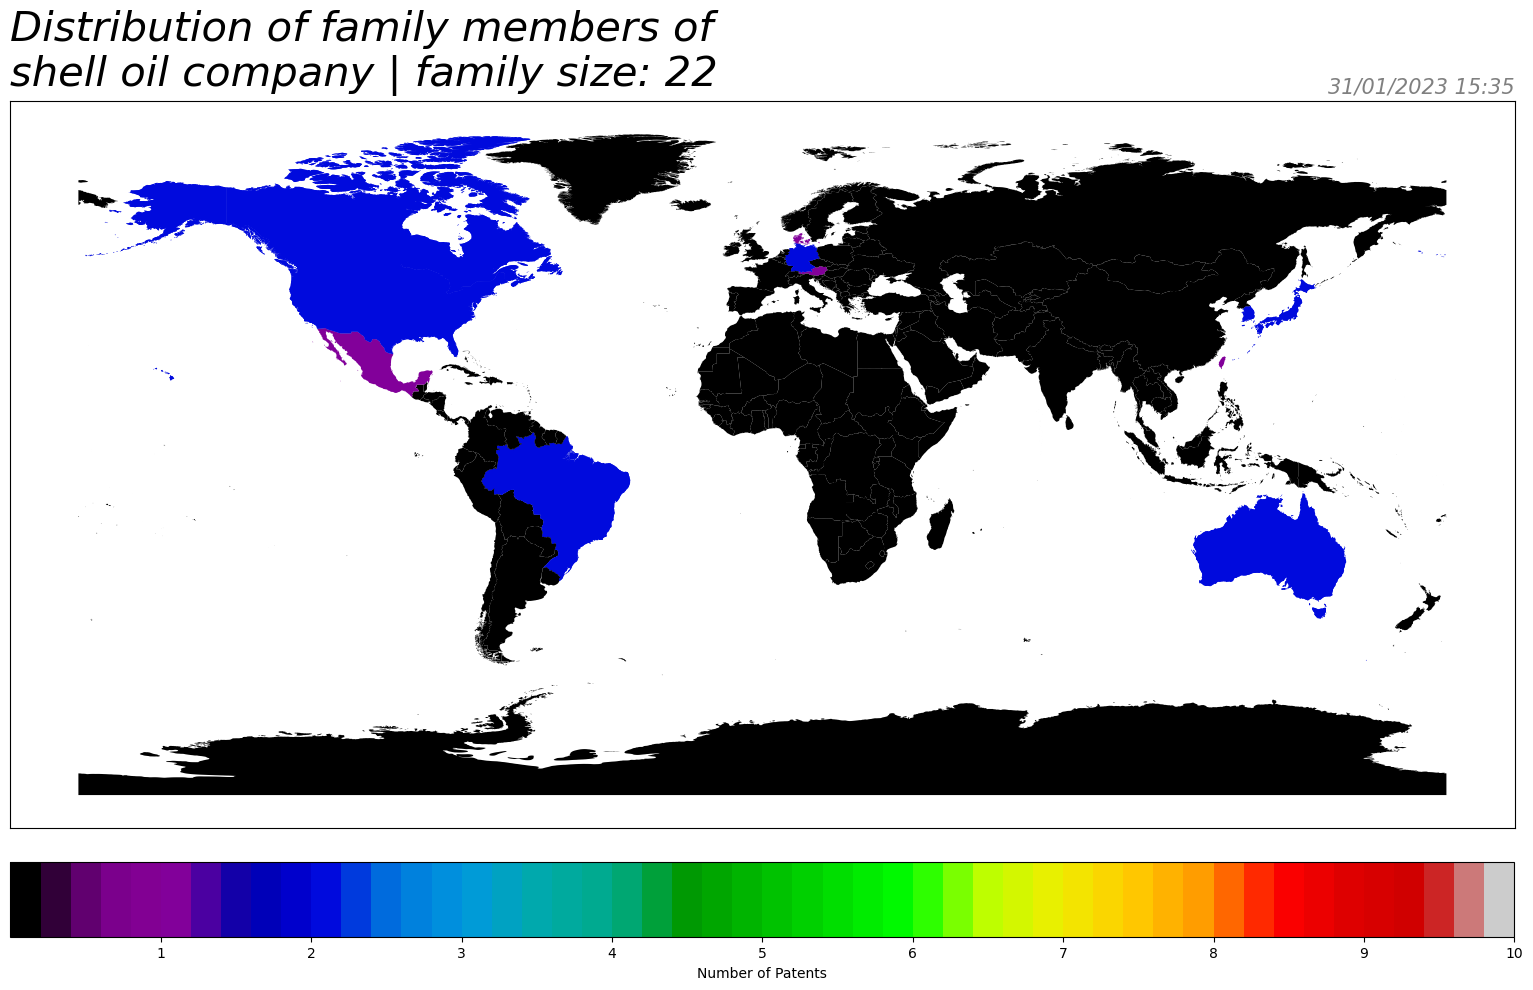

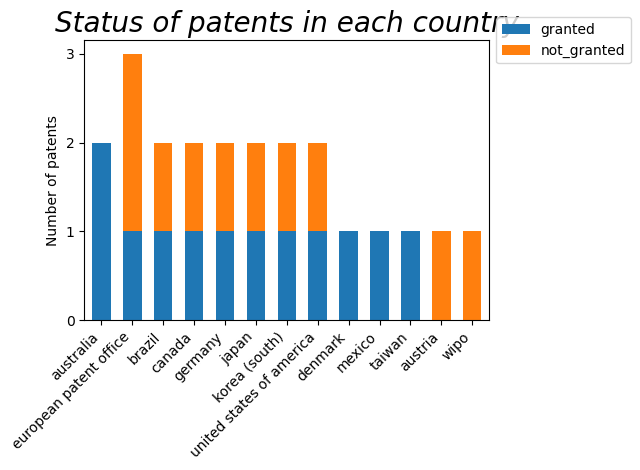

length of the family: 22 
the family: ['AU2002336664B2', 'AT299403T', 'AU2002336664C1', 'BR200213511A', 'BRPI0213511B1', 'CA2462215A1', 'CA2462215C', 'DE60205038D1', 'DE60205038T2', 'DK1467826T3', 'EP1467826A1', 'EP1467826B1', 'EP1467826B8', 'JP04509558B2', 'JP2005506902A', 'KR2004048428A', 'KR925129B1', 'MX2004003712A', 'TW564192B', 'US20040126190A1', 'US6951436B2', 'WO2003035290A1']
None
None


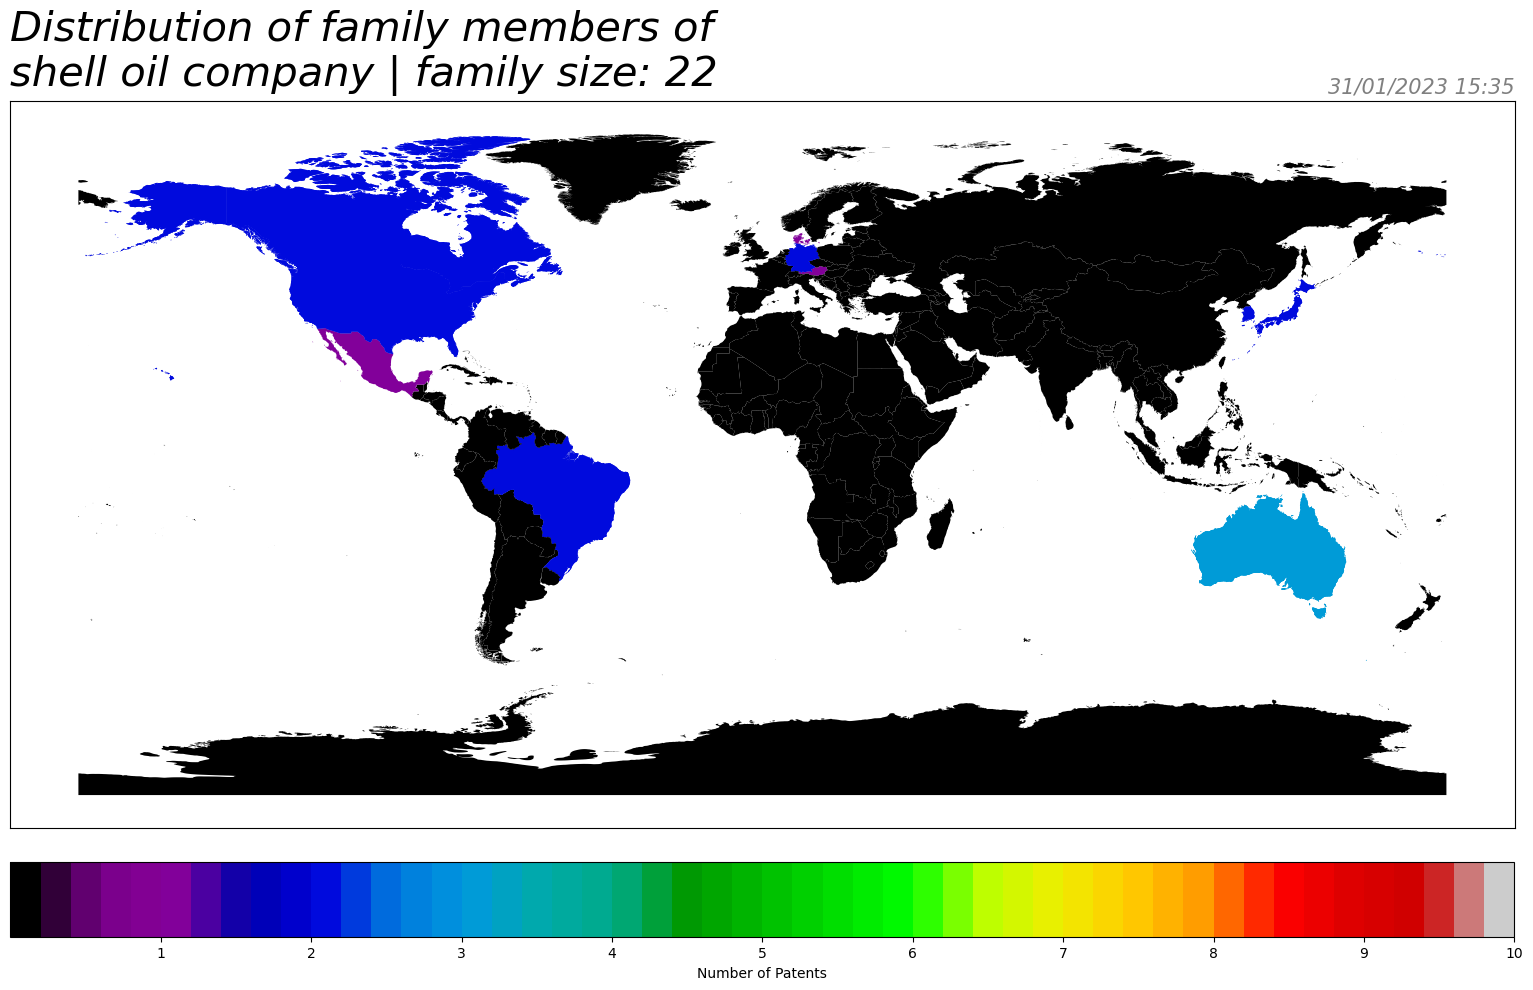

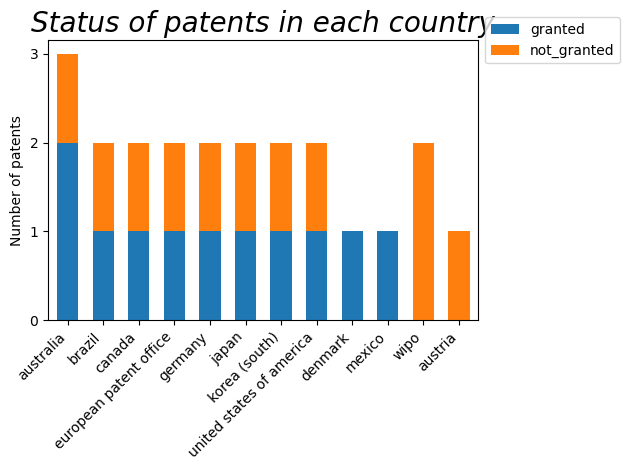

length of the family: 22 
the family: ['CA2463053C', 'AT342138T', 'AU2002365145A1', 'AU2002365145B2', 'AU2002365145C1', 'BR200213512A', 'BRPI0213512B1', 'CA2463053A1', 'DE60215378D1', 'DE60215378T2', 'DK1446239T3', 'EP1446239A2', 'EP1446239B1', 'JP04344803B2', 'JP2005512791A', 'KR2004048991A', 'KR925130B1', 'MX2004003716A', 'US20040120771A1', 'US6962466B2', 'WO2003053603A2', 'WO2003053603A3']
None
None


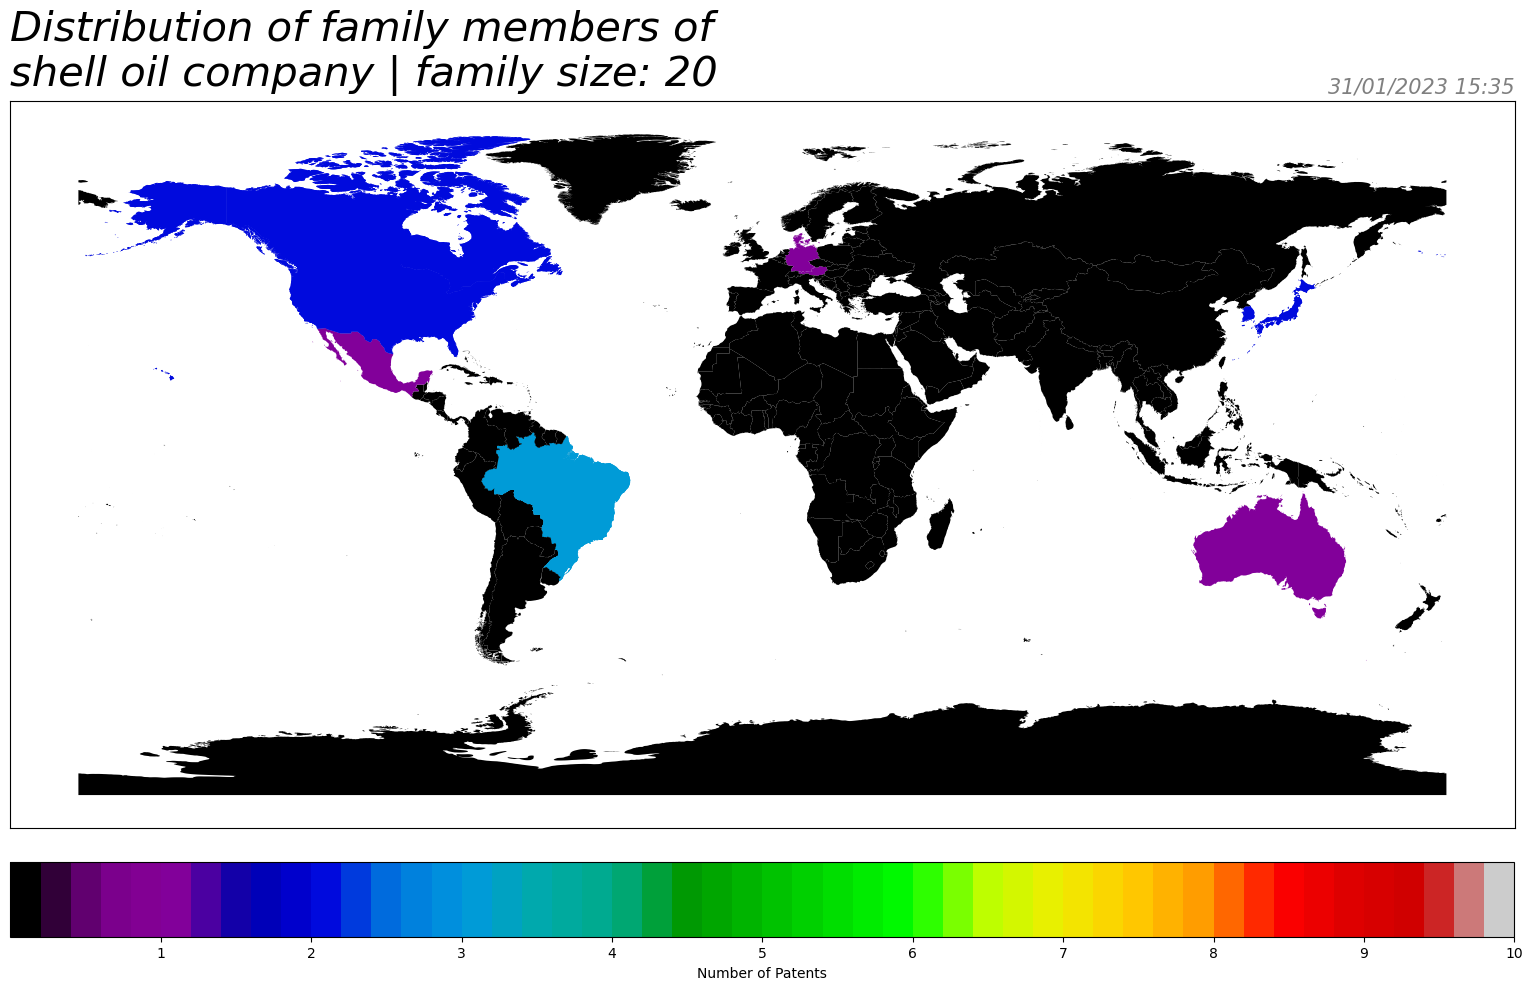

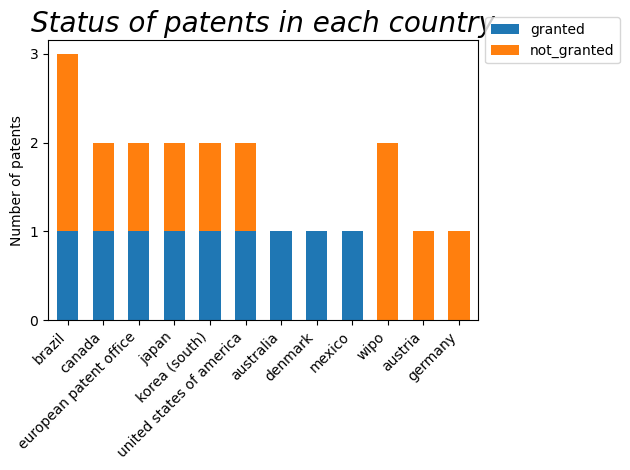

length of the family: 20 
the family: ['CA2463108A1', 'AT402294T', 'AU2002359299B2', 'BR200213513A', 'BRPI0213513B1', 'BRPI0213513B8', 'CA2463108C', 'DE60227826D1', 'DK1438462T3', 'EP1438462A2', 'EP1438462B1', 'JP04344795B2', 'JP2005516751A', 'KR2004048973A', 'KR900892B1', 'MX2004003711A', 'US20040120772A1', 'US6854929B2', 'WO2003035987A2', 'WO2003035987A3']
None
None


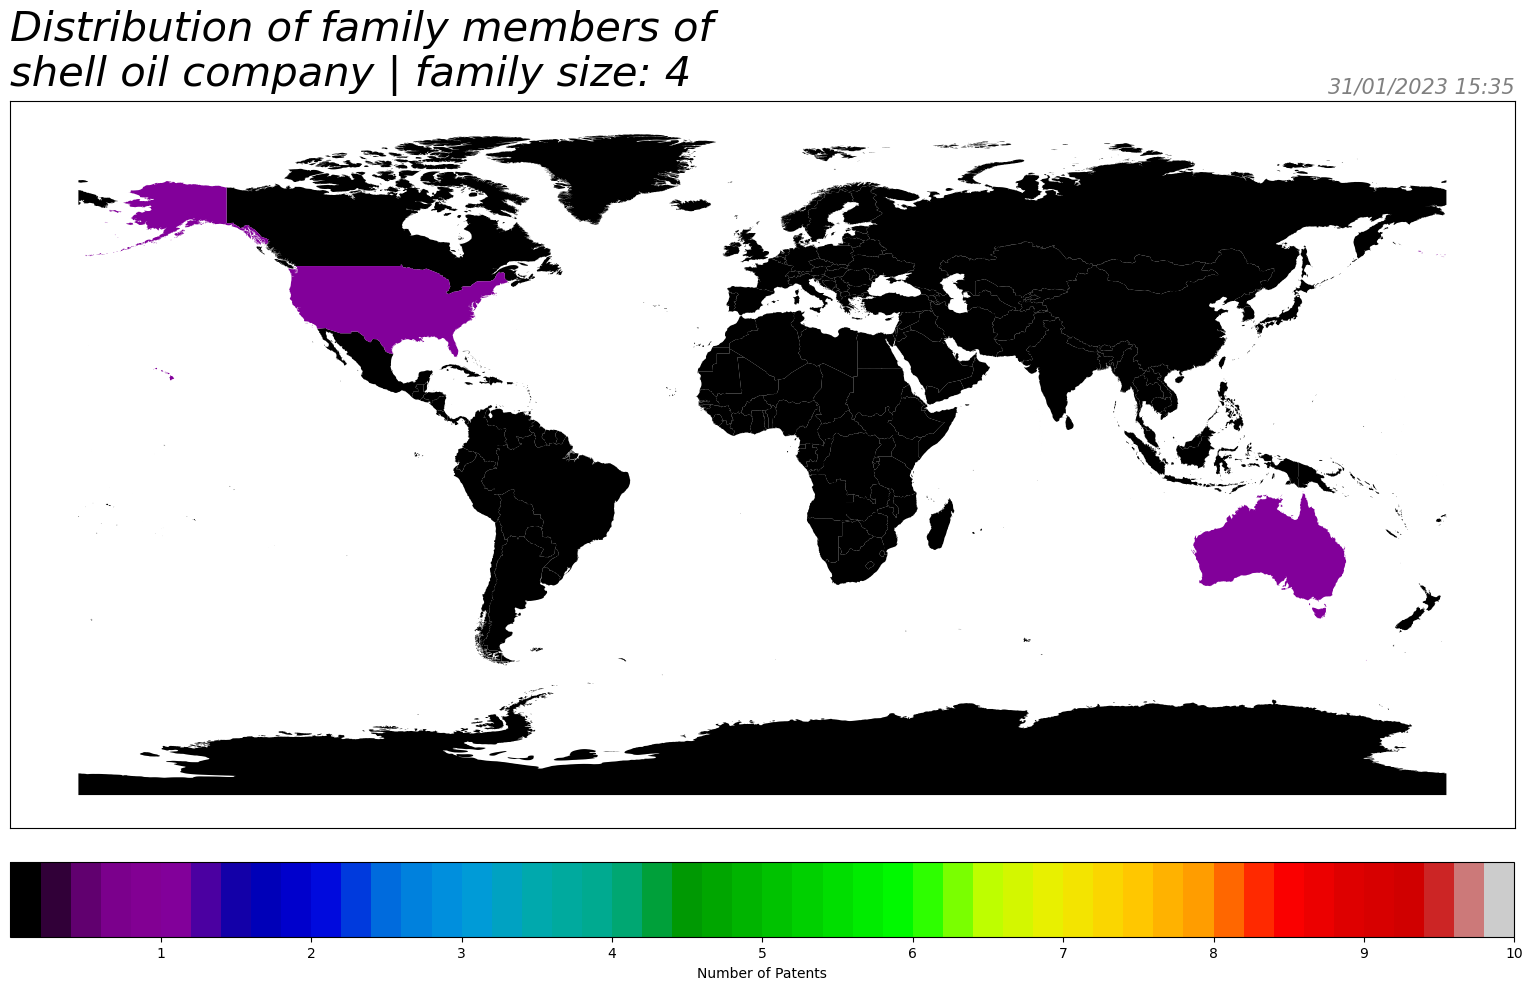

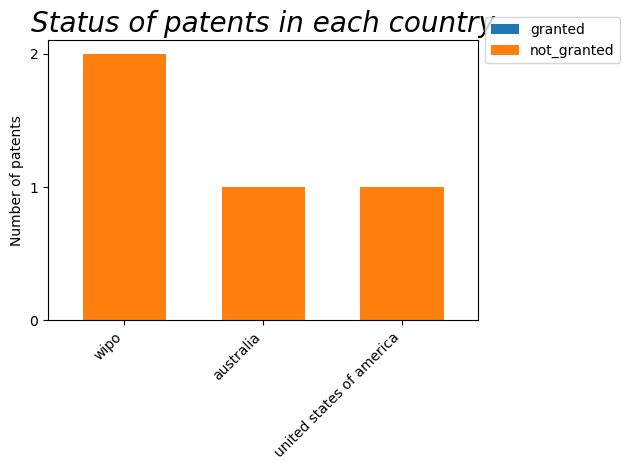

length of the family: 4 
the family: ['WO2003051546A2', 'AU2002364942A1', 'US20030110794A1', 'WO2003051546A3']
None
None


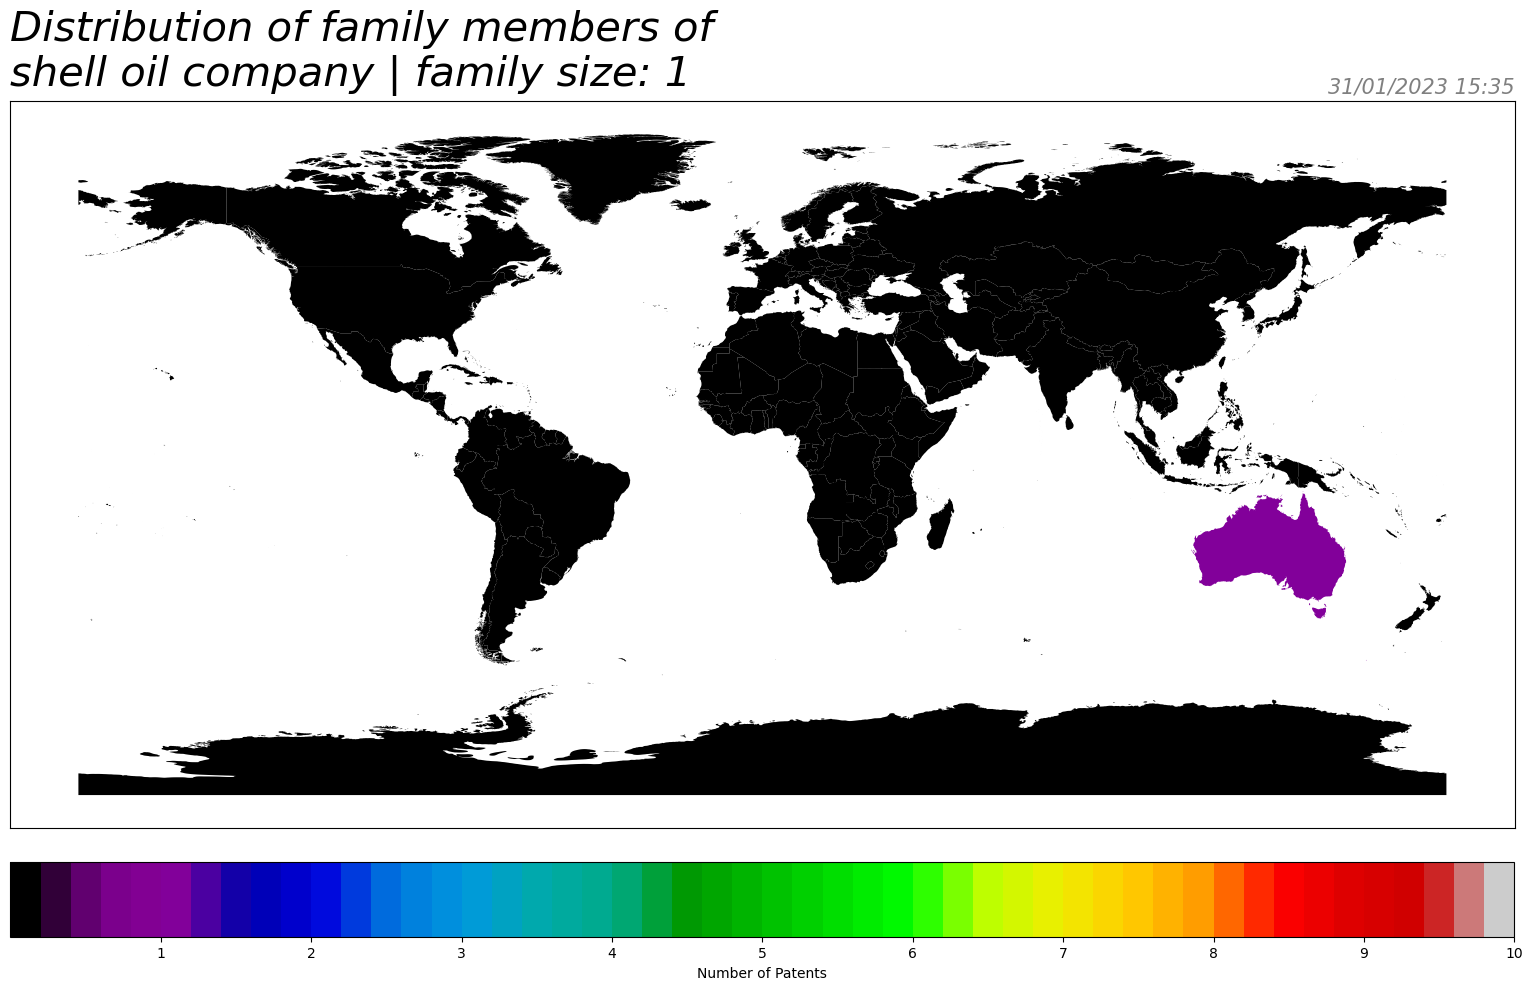

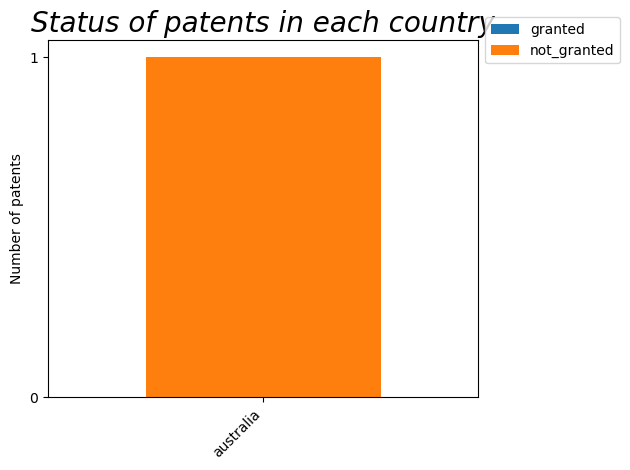

length of the family: 1 
the family: ['AU2002336664A1']
None
None


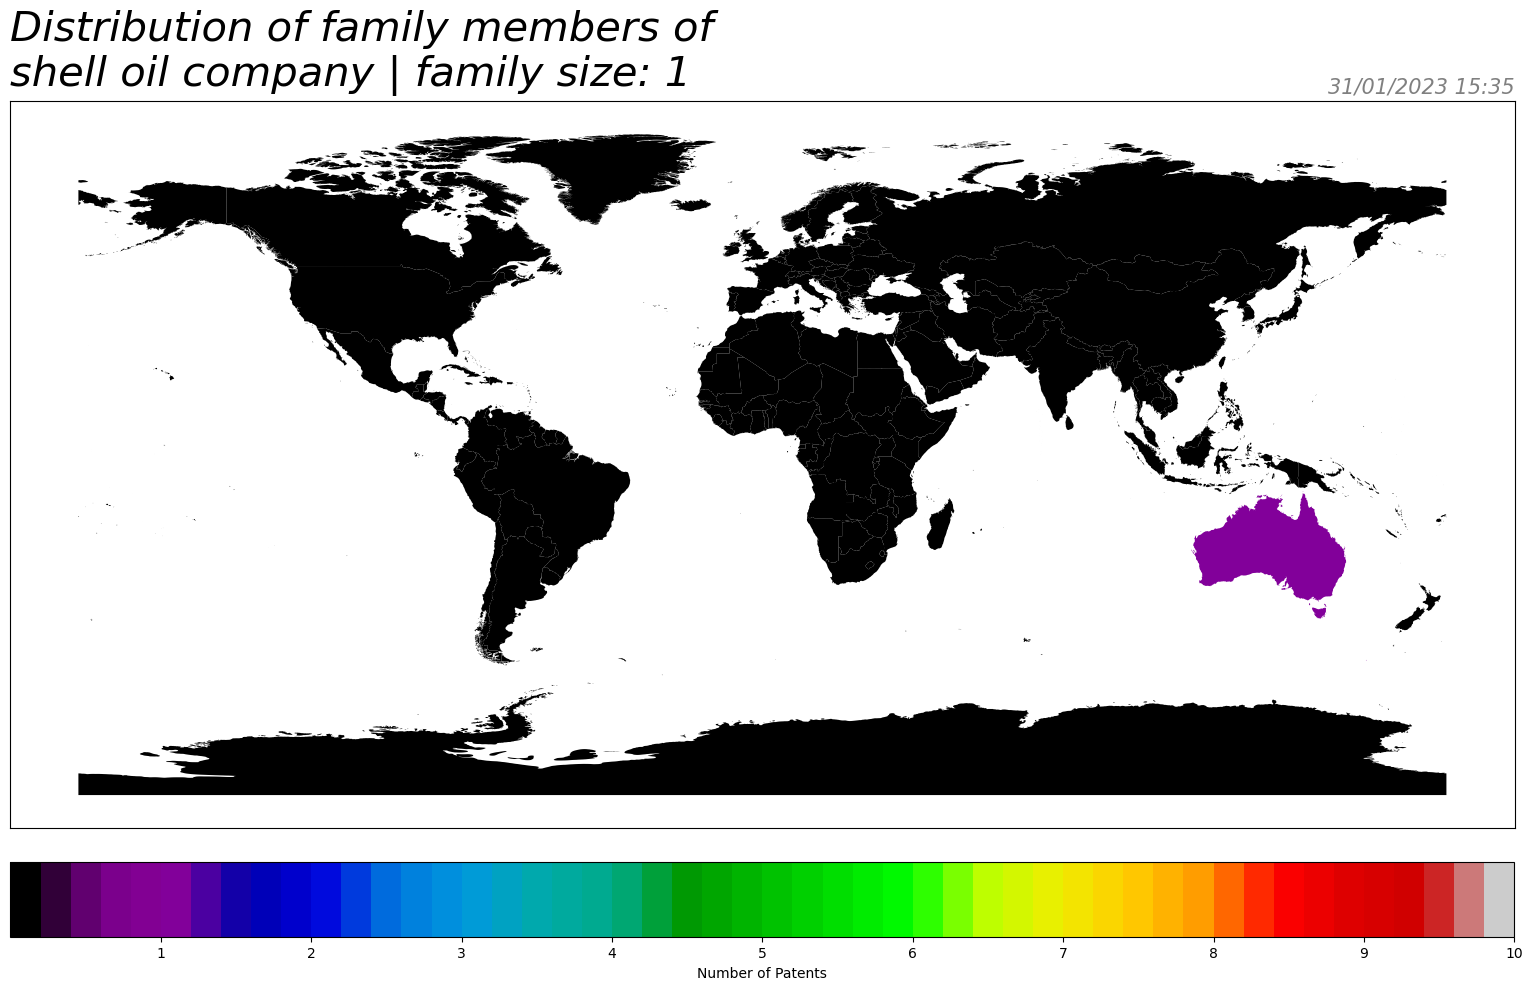

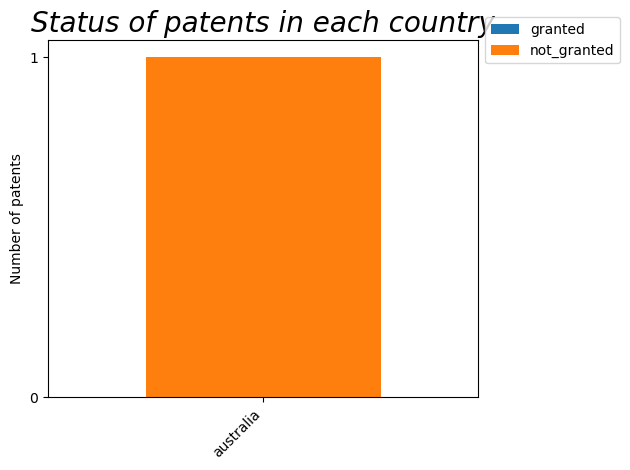

length of the family: 1 
the family: ['AU2002359299A1']
None
None


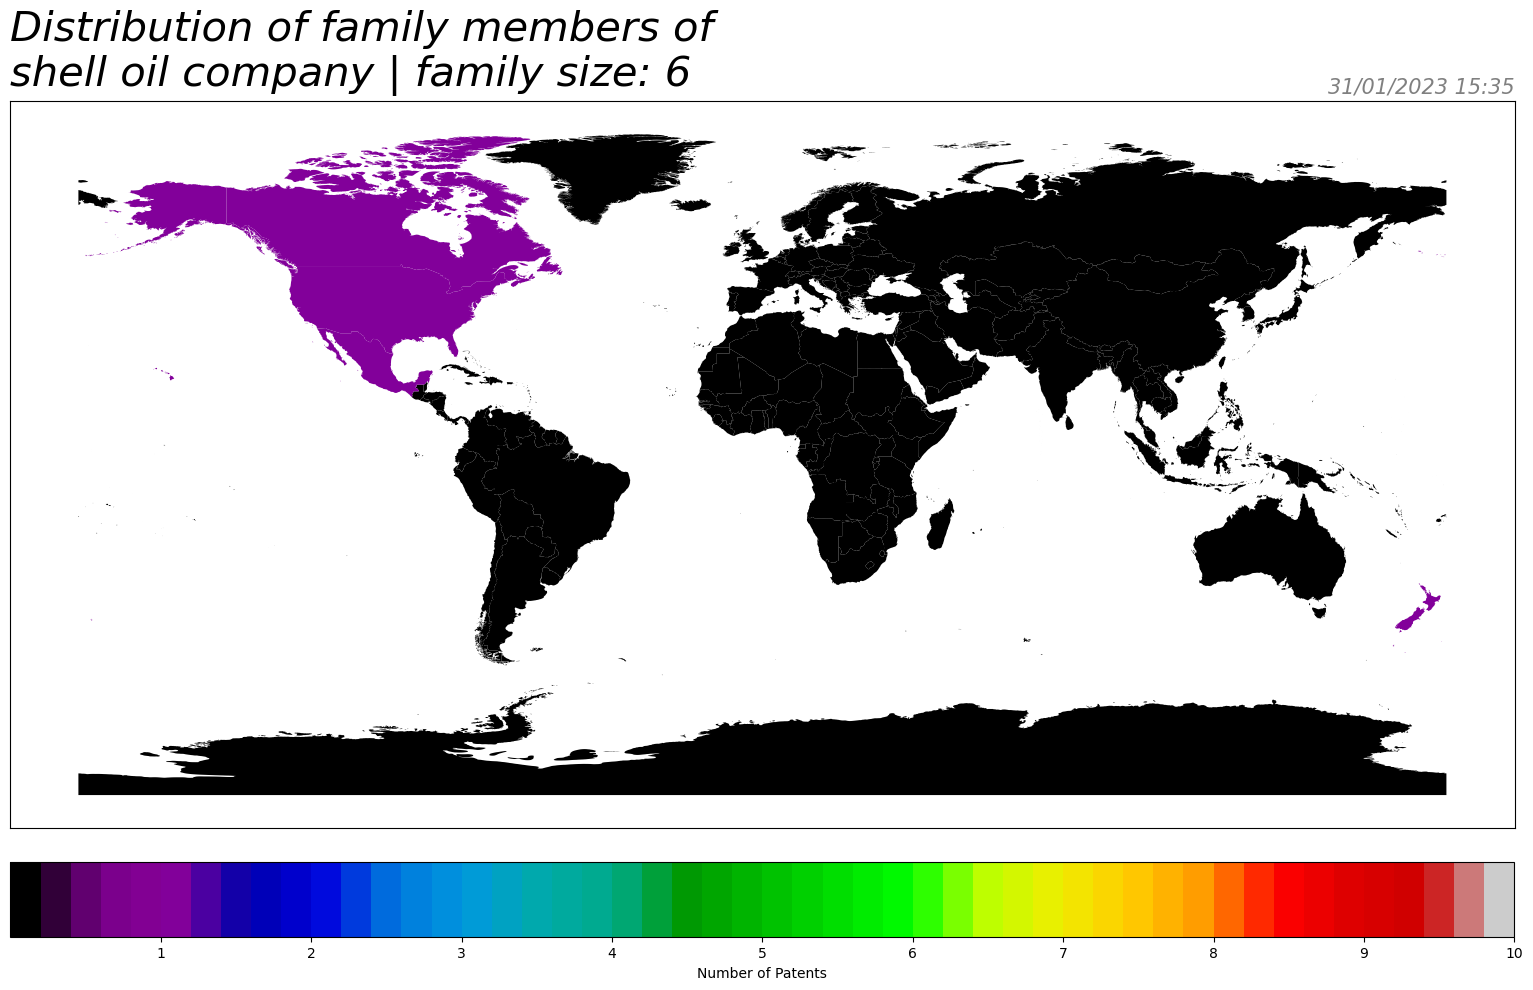

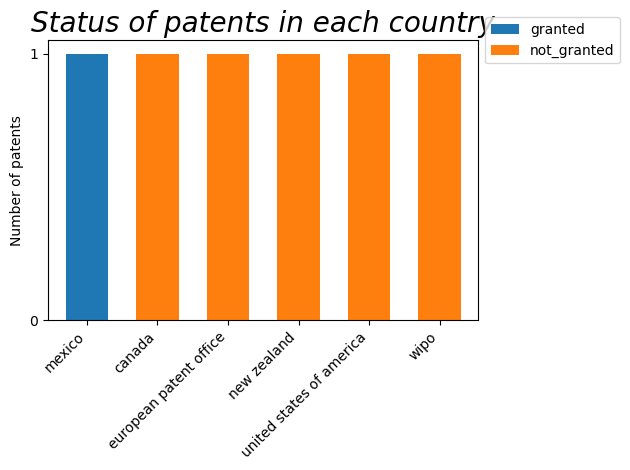

length of the family: 6 
the family: ['US20050116198A1', 'CA2472346A1', 'EP1456323A1', 'MX2004004427A', 'NZ533407A', 'WO2003040258A1']
None
None


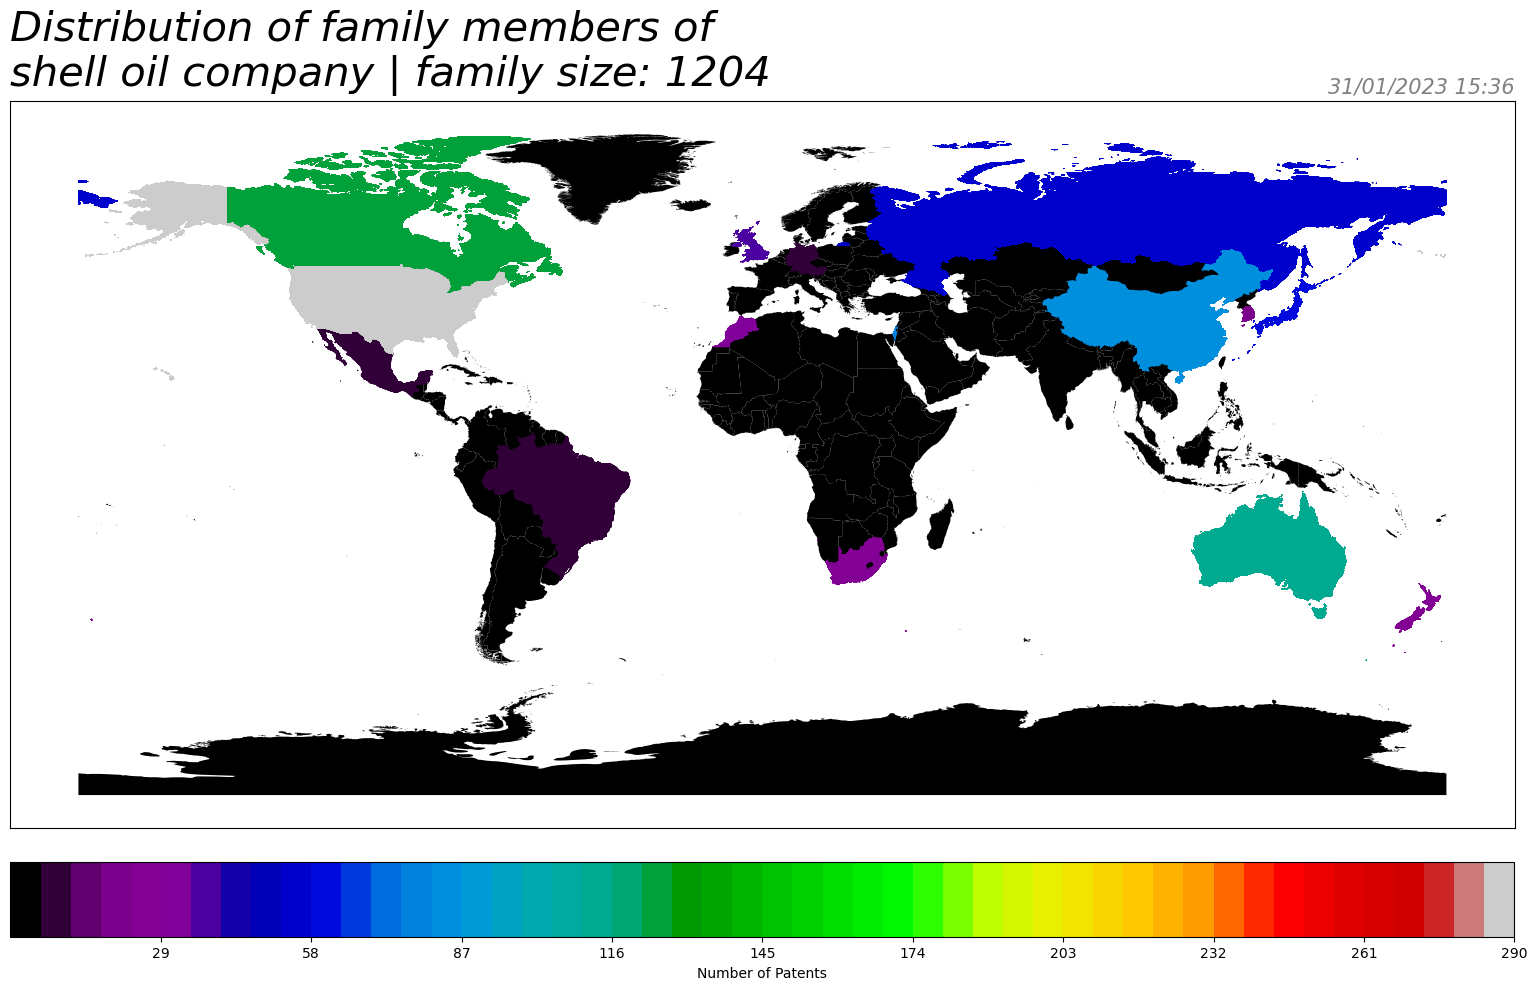

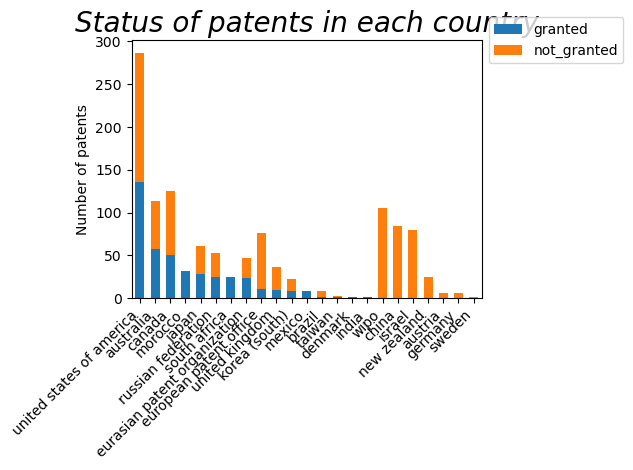

length of the family: 1204 
the family: ['AU2006340864B2', 'AT427410T', 'AT434713T', 'AT435964T', 'AT437290T', 'AT463658T', 'AT499428T', 'AU2006239886A1', 'AU2006239886B2', 'AU2006239958A1', 'AU2006239958B2', 'AU2006239961A1', 'AU2006239961B2', 'AU2006239962A1', 'AU2006239962B2', 'AU2006239962B8', 'AU2006239963A1', 'AU2006239963B2', 'AU2006239988A1', 'AU2006239988B2', 'AU2006239996A1', 'AU2006239996B2', 'AU2006239997A1', 'AU2006239997B2', 'AU2006239999A1', 'AU2006239999B2', 'AU2006240033A1', 'AU2006240033B2', 'AU2006240043A1', 'AU2006240043B2', 'AU2006240173A1', 'AU2006240173B2', 'AU2006240175A1', 'AU2006240175B2', 'AU2006306404A1', 'AU2006306404B2', 'AU2006306411A1', 'AU2006306411B2', 'AU2006306412A1', 'AU2006306412B2', 'AU2006306414A1', 'AU2006306414B2', 'AU2006306471A1', 'AU2006306471B2', 'AU2006306472A1', 'AU2006306472B2', 'AU2006306475A1', 'AU2006306475B2', 'AU2006306476A1', 'AU2006306476B2', 'AU2006340864A1', 'AU2006340864B9', 'AU2007240346A1', 'AU2007240346B2', 'AU2007240353A1',

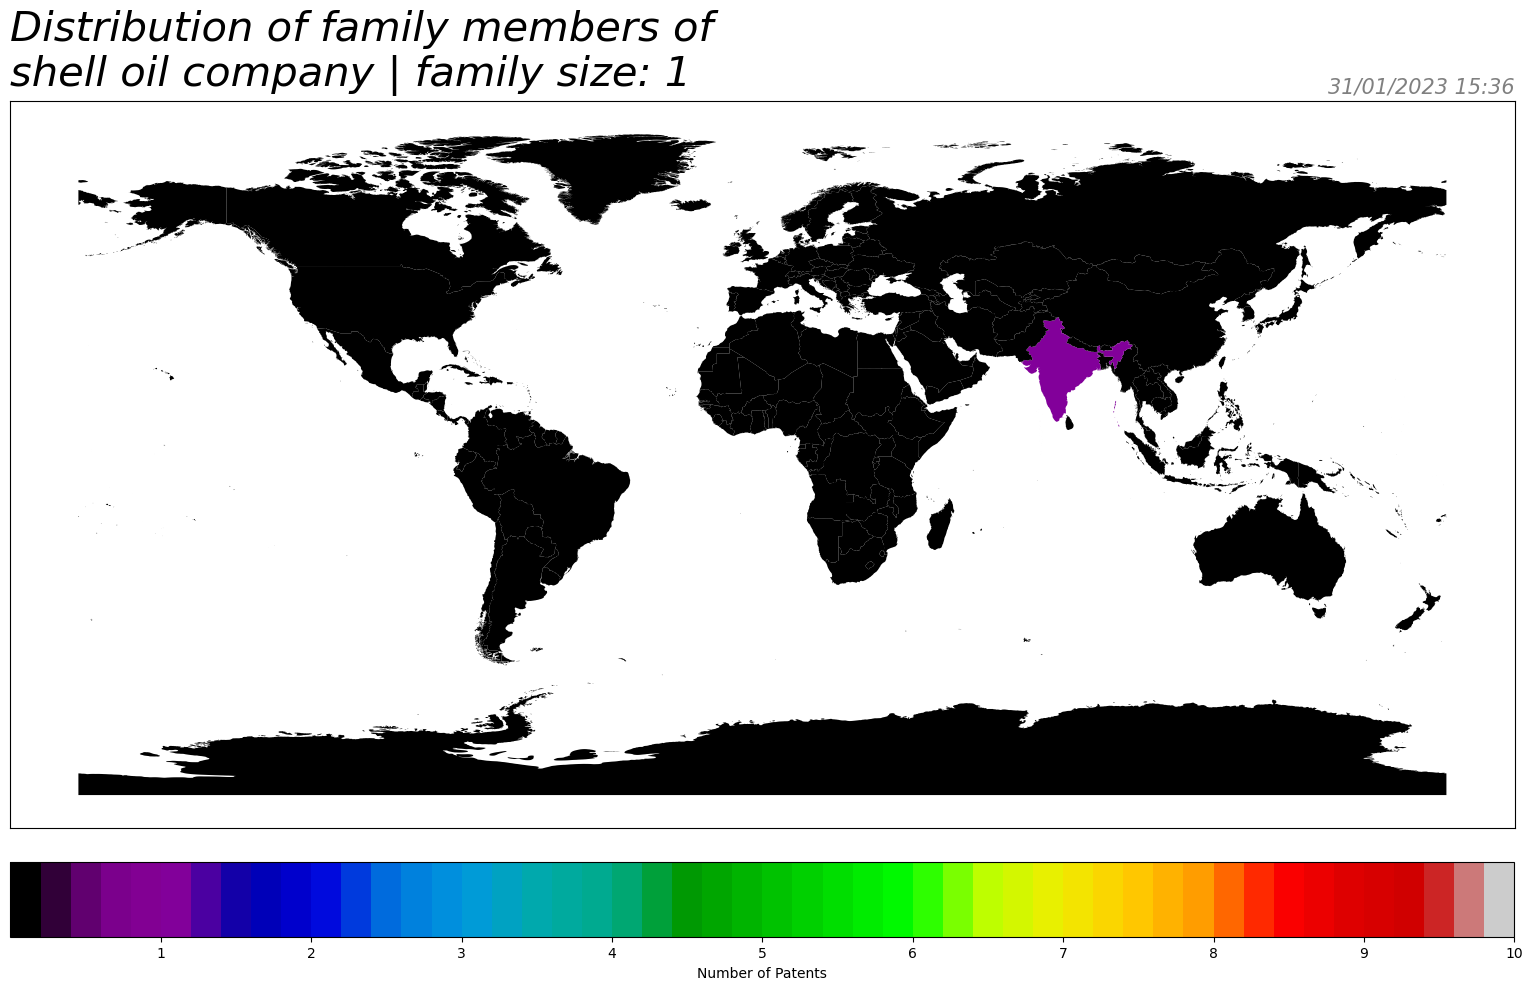

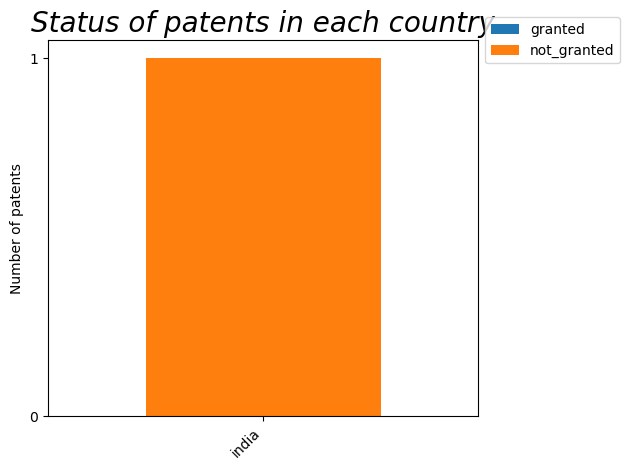

length of the family: 1 
the family: ['IN200802610P4']
None
None


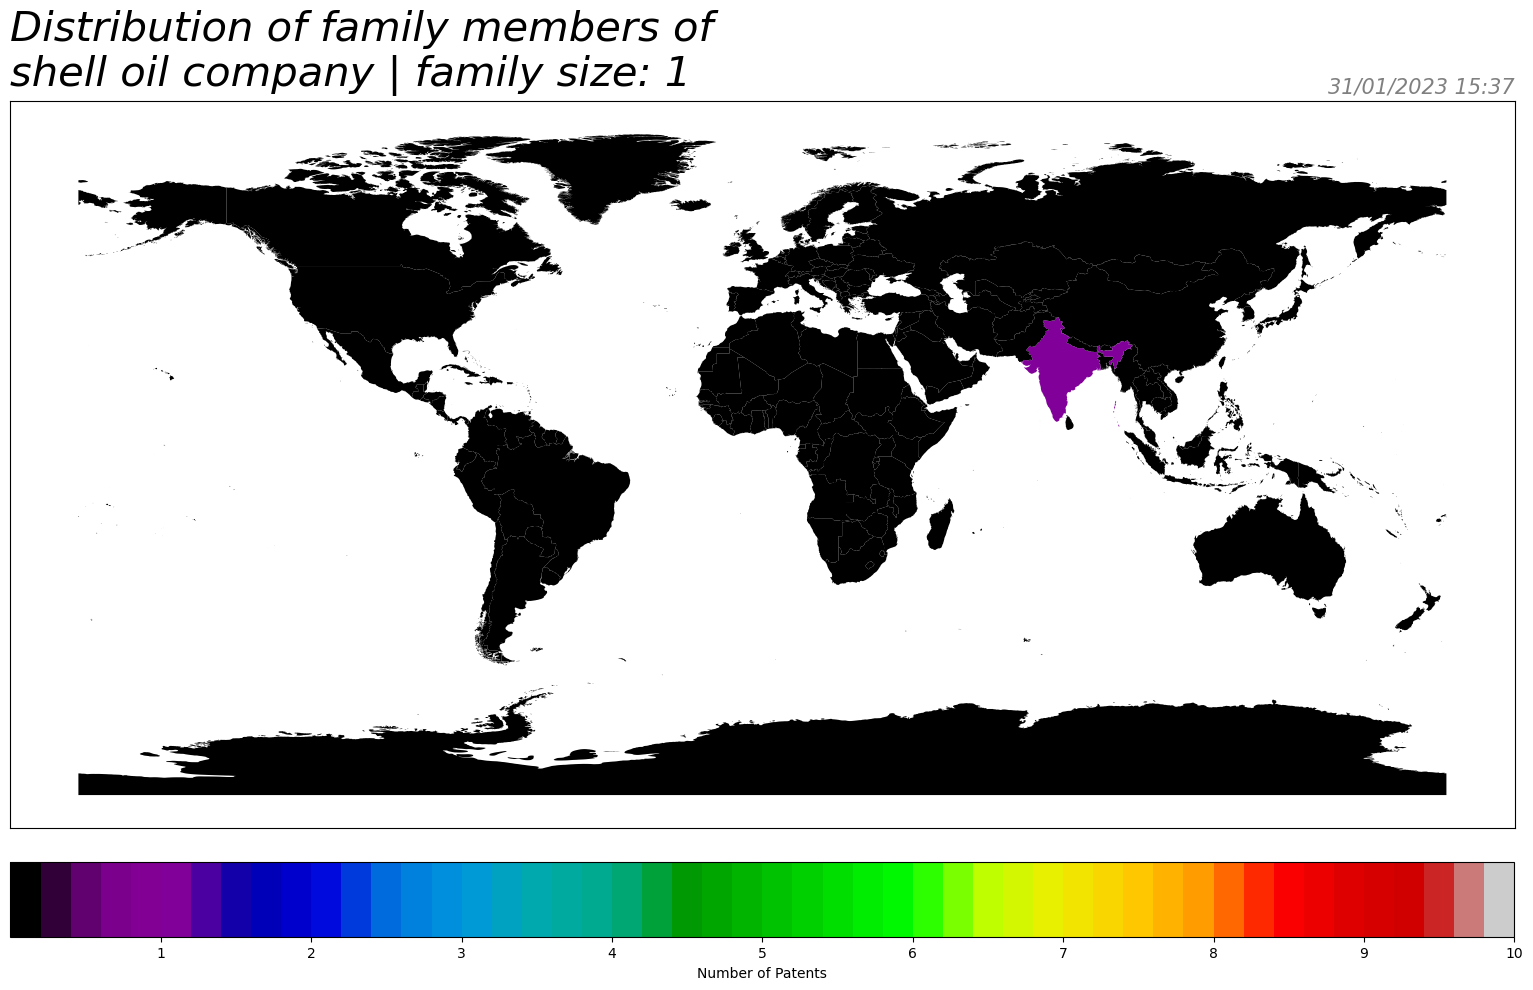

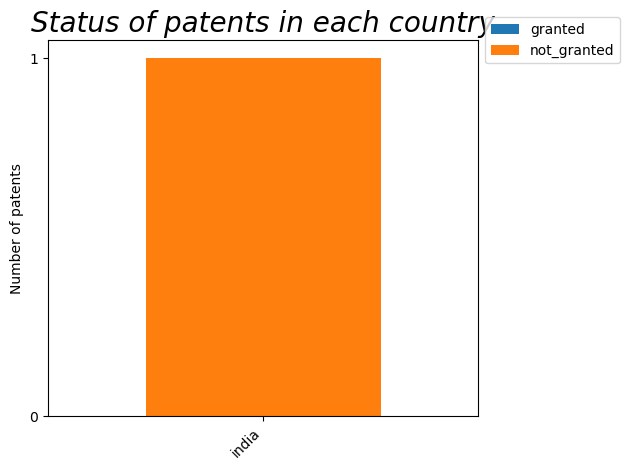

length of the family: 1 
the family: ['IN200805642P4']
None
None


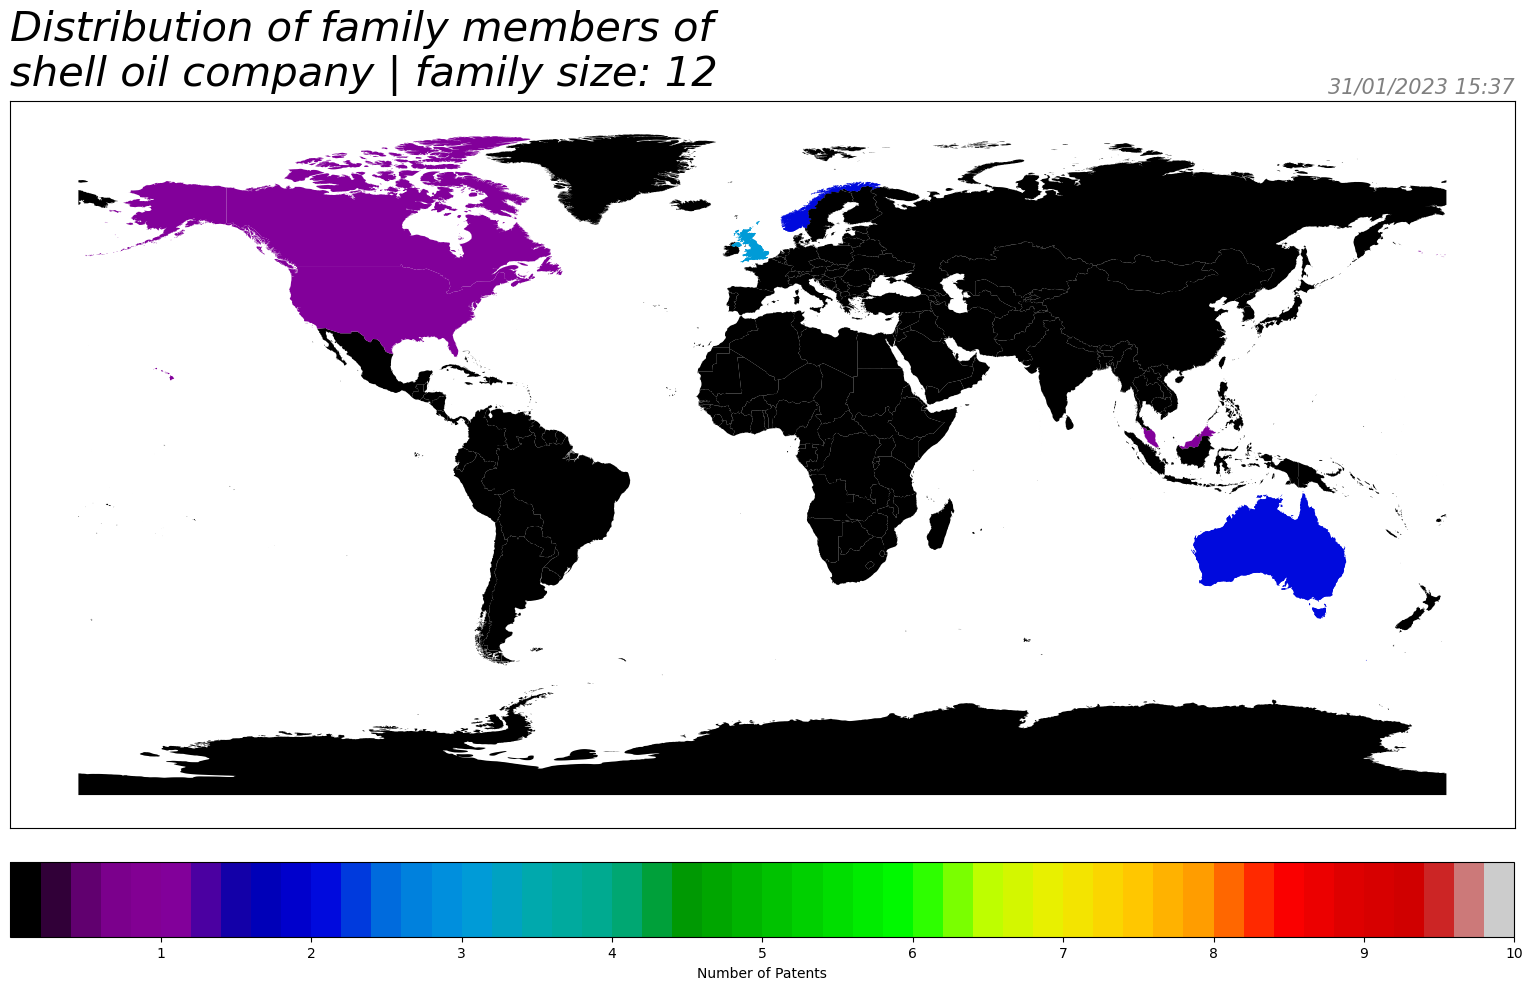

length of the family: 12 
the family: ['GB2457210B', 'AU2008206913A1', 'AU2008206913B2', 'CA2673412A1', 'GB200910578D0', 'GB2457210A', 'MY153029A', 'NO200902867L', 'NO341093B1', 'US20110139462A1', 'WO2008087174A2', 'WO2008087174A3']
None
None


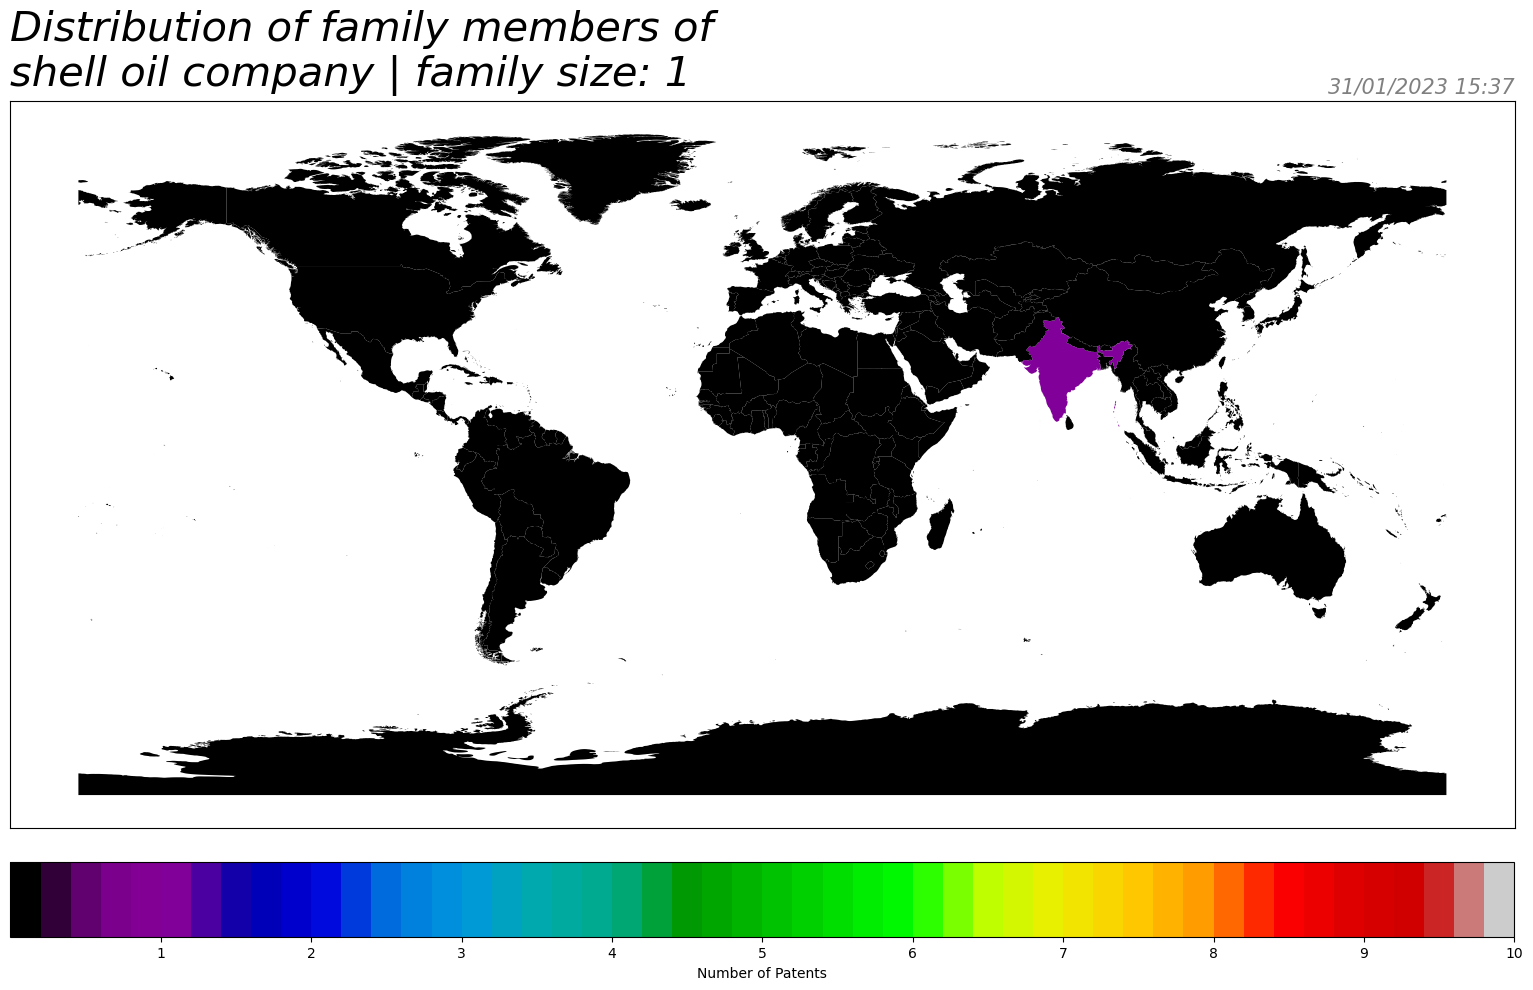

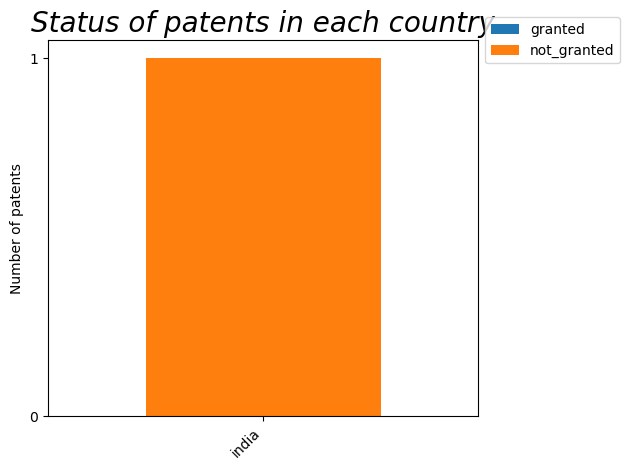

length of the family: 1 
the family: ['IN200906206P4']
None
None


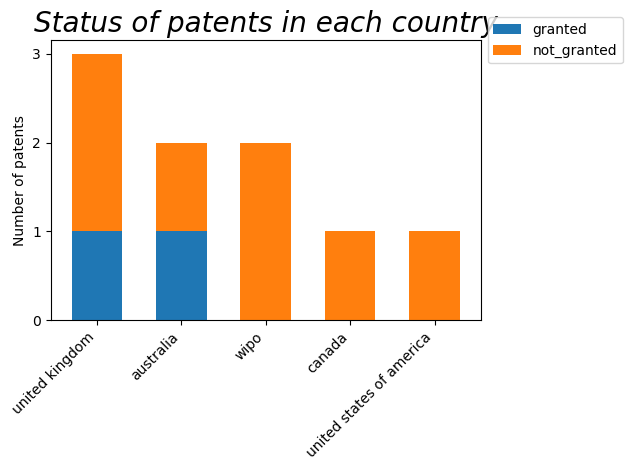

length of the family: 9 
the family: ['US20110046934A1', 'AU2008292169A1', 'AU2008292169B2', 'CA2695137A1', 'GB201001835D0', 'GB2464643A', 'GB2464643B', 'WO2009027420A2', 'WO2009027420A3']
None
None


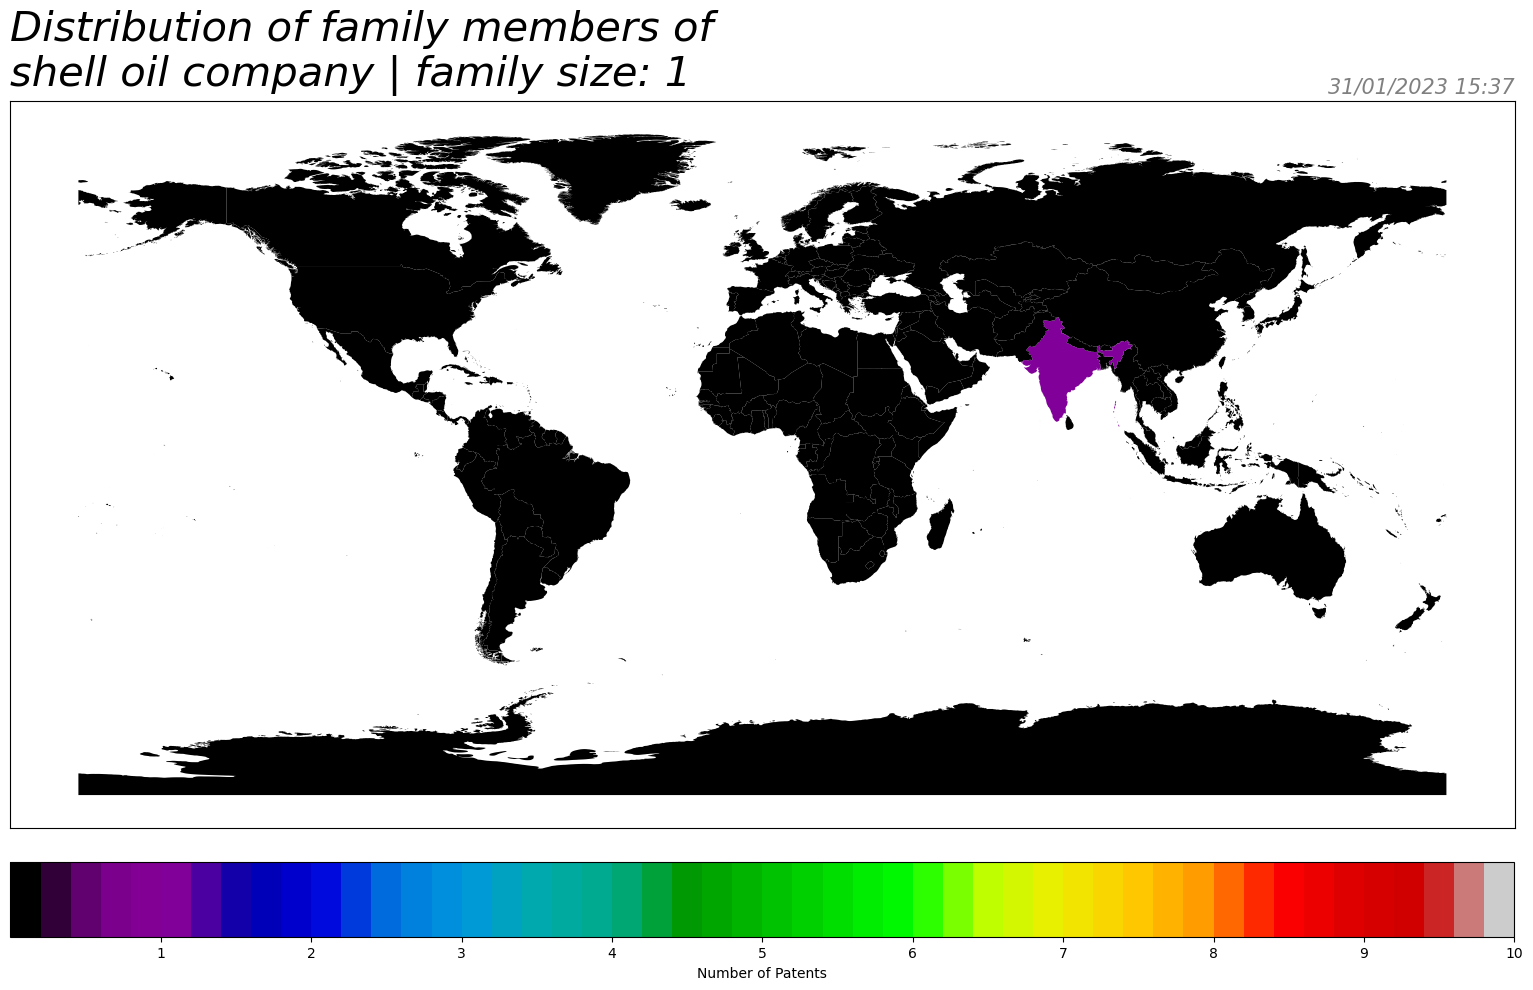

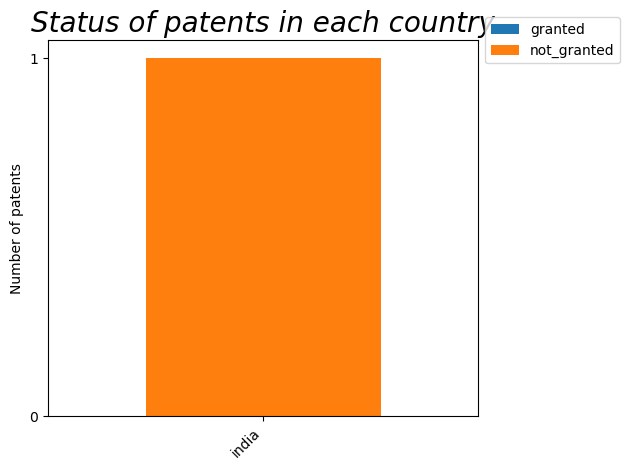

length of the family: 1 
the family: ['IN201002696P4']
None
None


length of the family: 6 
the family: ['AU2012203086B2', 'AU2012203086A1', 'AU2012203086A8', 'AU2012203086B8', 'AU2012203096A1', 'AU2012203096B2']
None
None


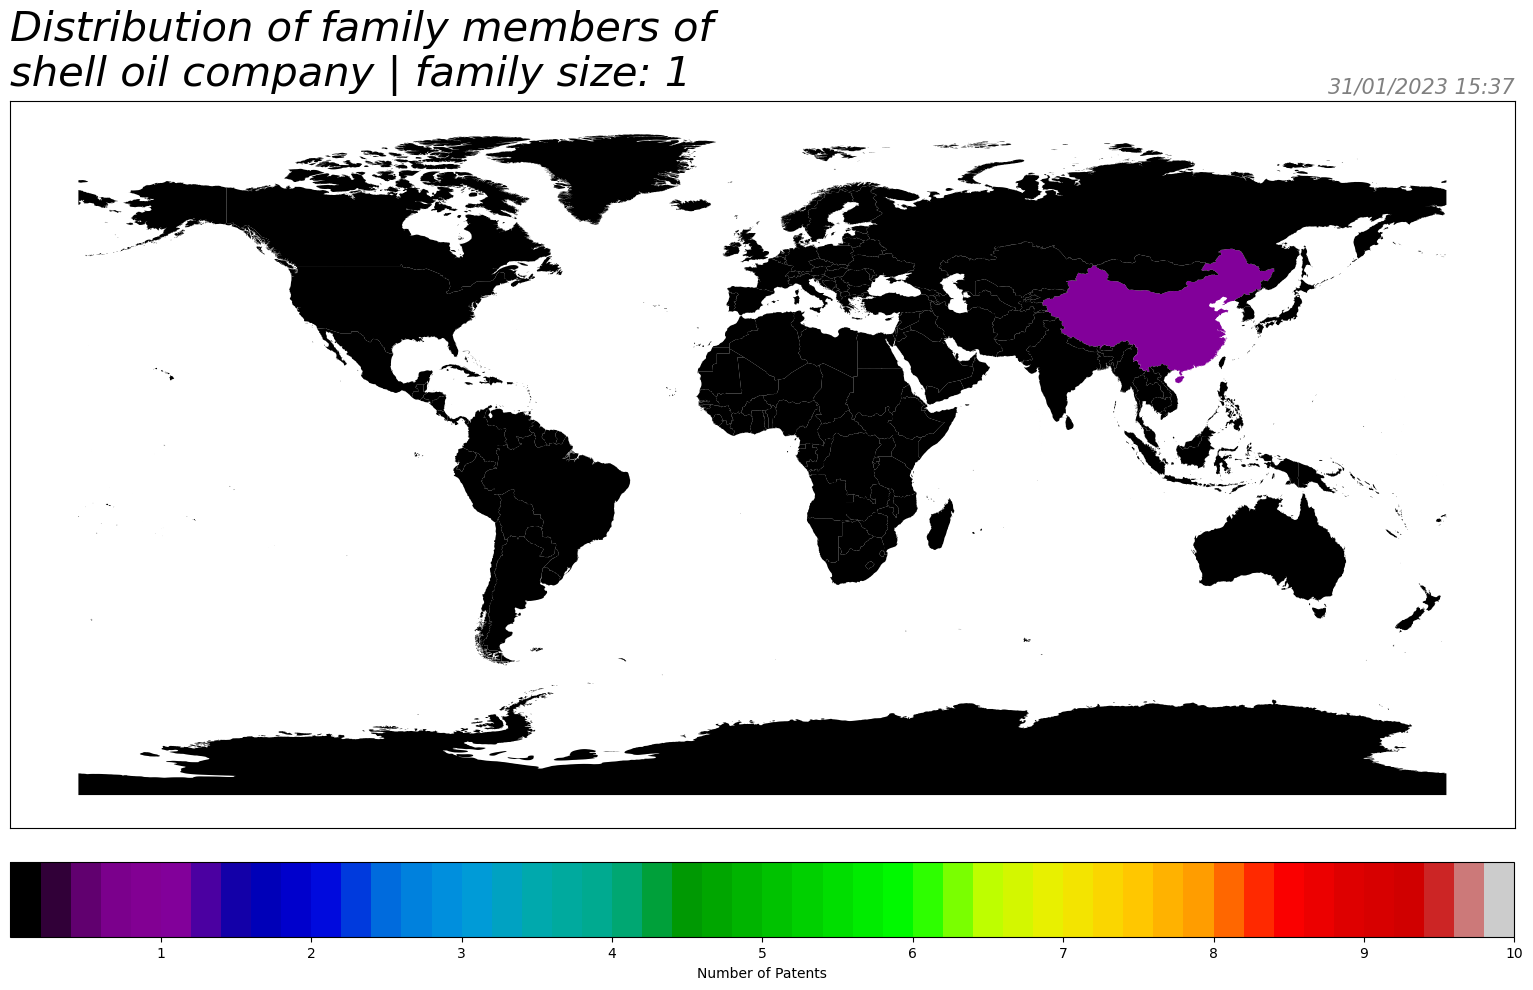

length of the family: 1 
the family: ['CN205934968U']
None
None


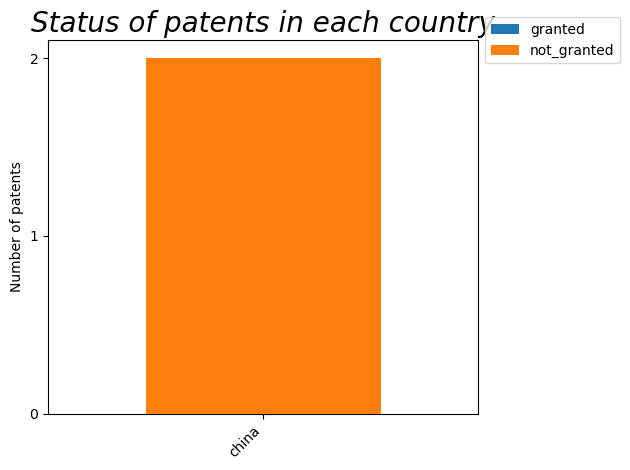

length of the family: 2 
the family: ['CN106088154A', 'CN106088154B']
None
None


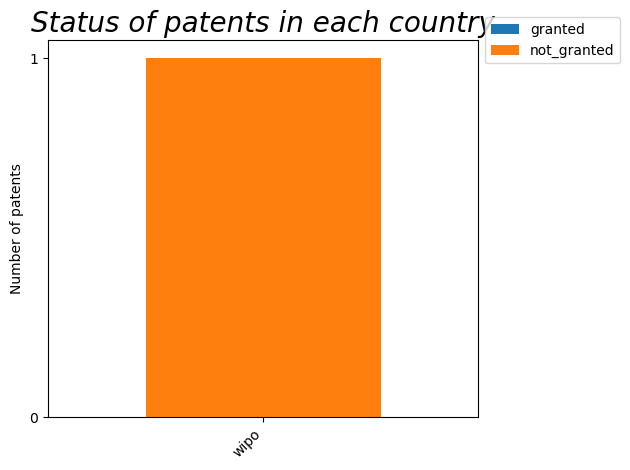

length of the family: 1 
the family: ['WO2021119235A1']
None
None


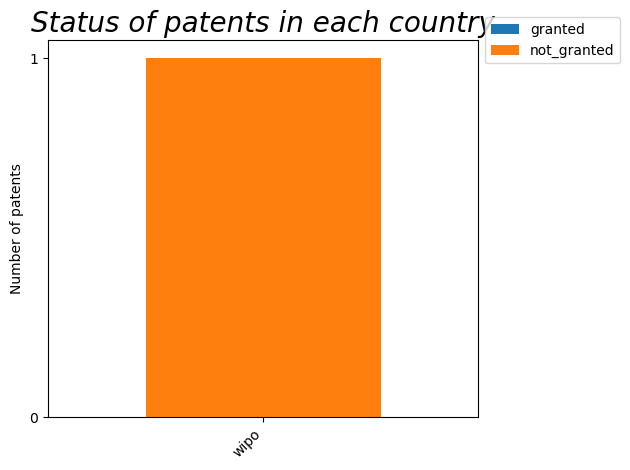

length of the family: 1 
the family: ['WO2021216638A1']
None
None


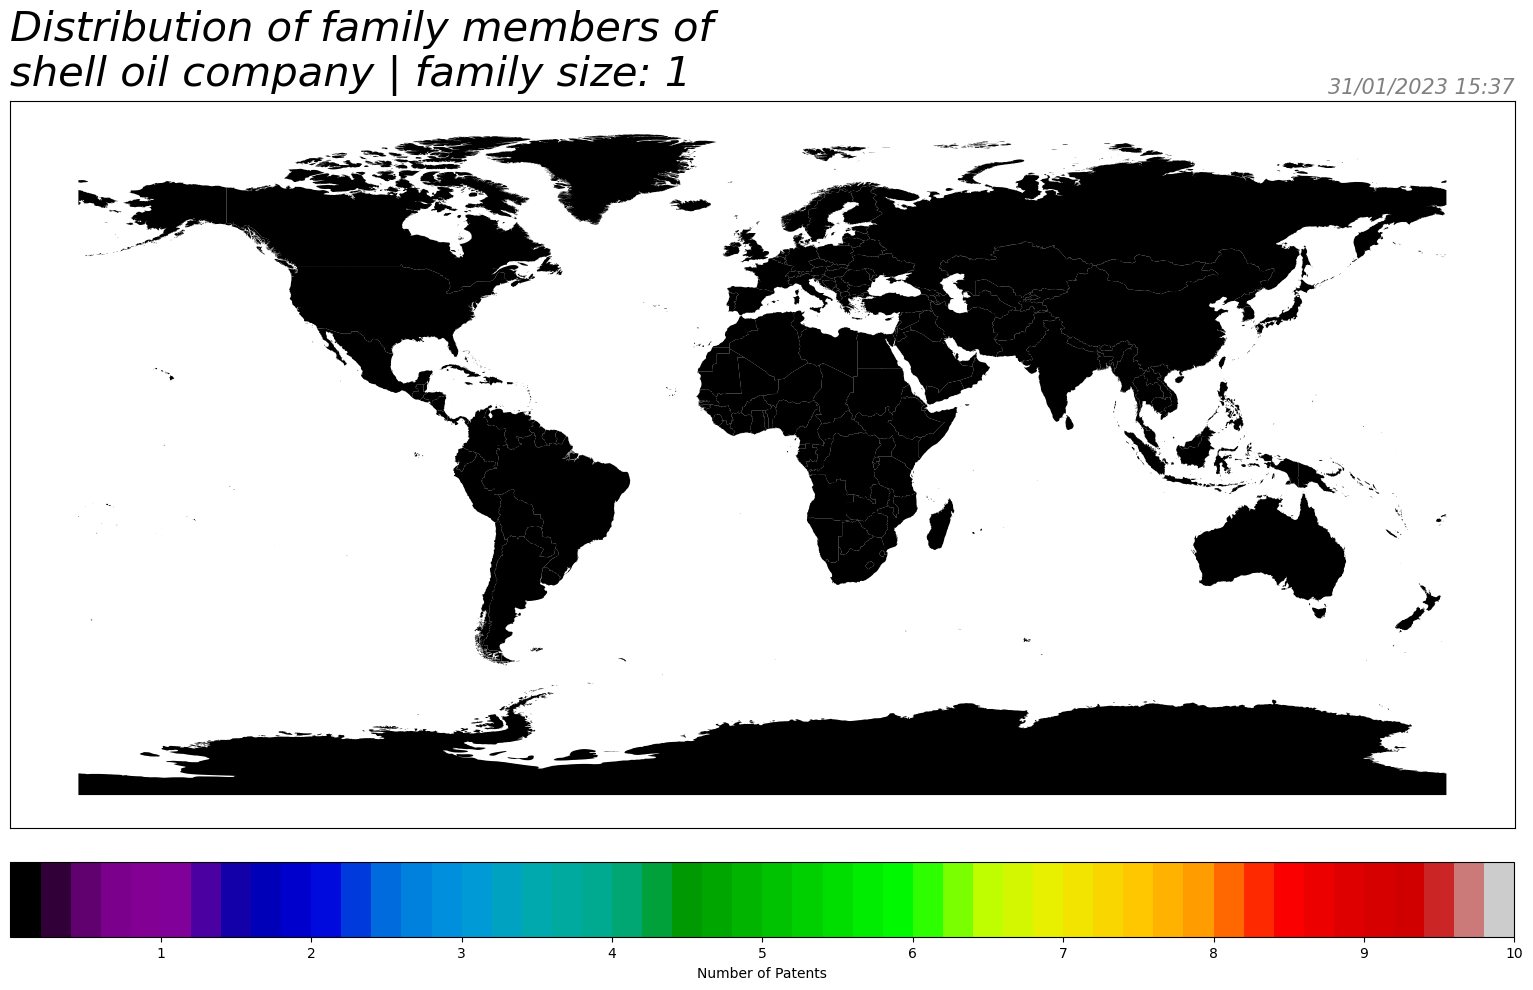

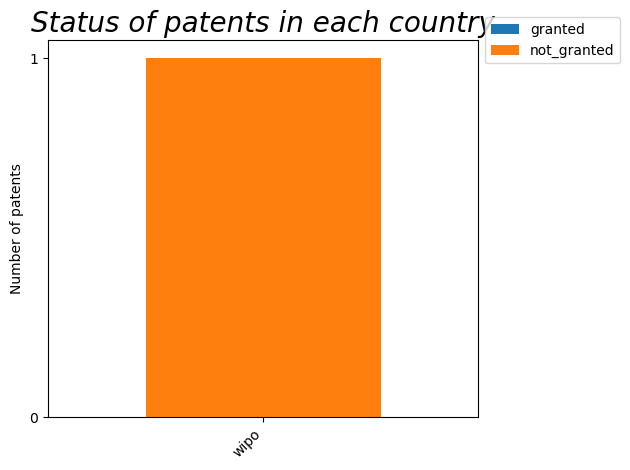

length of the family: 1 
the family: ['WO2022002810A1']
None
None


In [9]:

#plot for all patents (granted and not granted)
plot_worldmap_for_each_family(data_all_total)
